# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To print np arrays
import sys

np.set_printoptions(threshold=sys.maxsize)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
df_train = pd.read_csv("Train.csv")

<IPython.core.display.Javascript object>

In [3]:
data = df_train.copy()

<IPython.core.display.Javascript object>

In [4]:
data.shape

(40000, 41)

<IPython.core.display.Javascript object>

* Training dataset has 40000 rows and 41 columns.

In [5]:
df_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

In [6]:
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [7]:
data_test.shape

(10000, 41)

<IPython.core.display.Javascript object>

* Test dataset has 10000 rows and 41 columns.

**Test Data overview**

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

* As we already know, the test dataset has 10000 entries, and 41 columns.
* All columns are numerical and float data type, except for `Target` that is numerical but integer type (we expect this since we should have zeros and ones here).
* Columns `V1` and `V2` have some missing values.

In [9]:
data_test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* `V1` has 11 missing values.
* `V2` has 7 missing values.
* The other predictors and the target present no missing values.

In [10]:
data_test.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicated entries.

**Train Data overview**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

* As we already know, the train dataset has 40000 entries, and 41 columns.
* All columns are numerical and float data type, except for `Target` that is numerical but integer type (we only have zeros and ones here).
* Columns `V1` and `V2` have some missing values.

In [12]:
data.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* `V1` has 46 missing values.
* `V2` has 39 missing values.
* The other predictors and the target present no missing values.

In [13]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicated entries.

In [14]:
data.head() #checking the first 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


<IPython.core.display.Javascript object>

In [15]:
data.tail() #checking the last 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


<IPython.core.display.Javascript object>

## EDA

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


<IPython.core.display.Javascript object>

* As the mean of our target variable is lower than 0.5 we can assume we have more 0s than 1s.
* All predictors present both negative and positive values.
* Column `V32` present both the greatest negative value, -23.201, and the highest positive value, 24.848.

In [17]:
data.Target.value_counts()

0    37813
1     2187
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

* There are 2187 "Failure" records, and 87813 "No failure" records.
* Our target variable is inbalanced. We'll treat this inbalance with undersampling and oversampling techniques later in the model building process.

### Plotting histograms and boxplots for all the variables

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

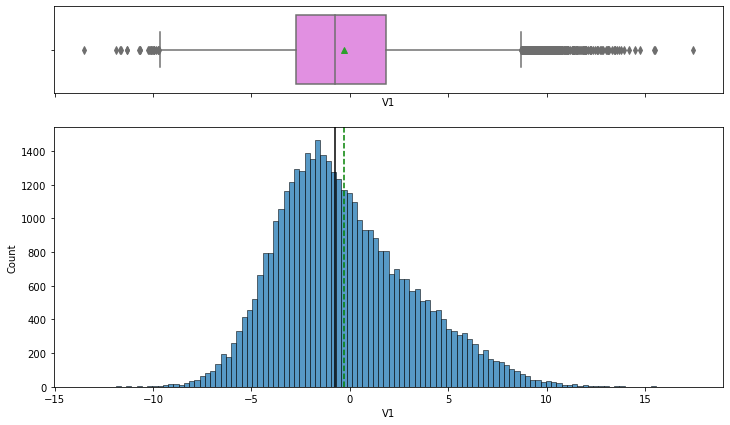

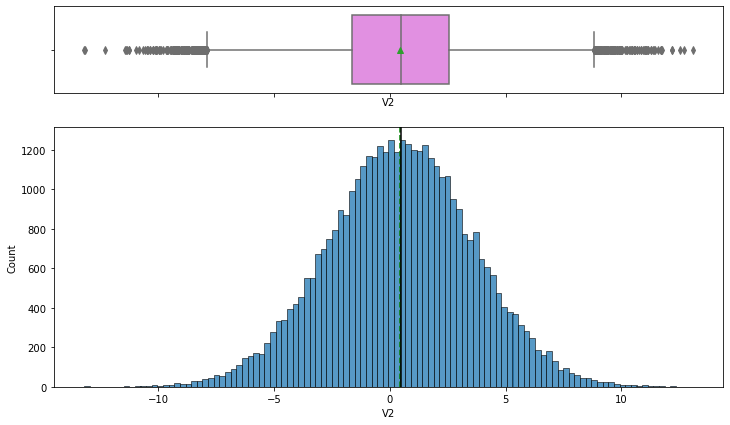

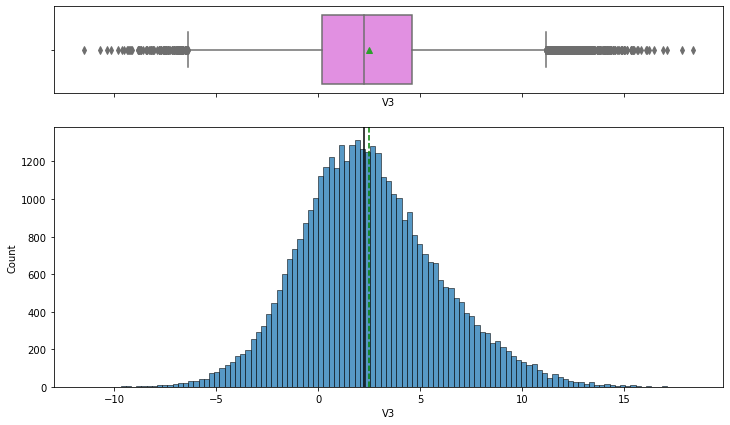

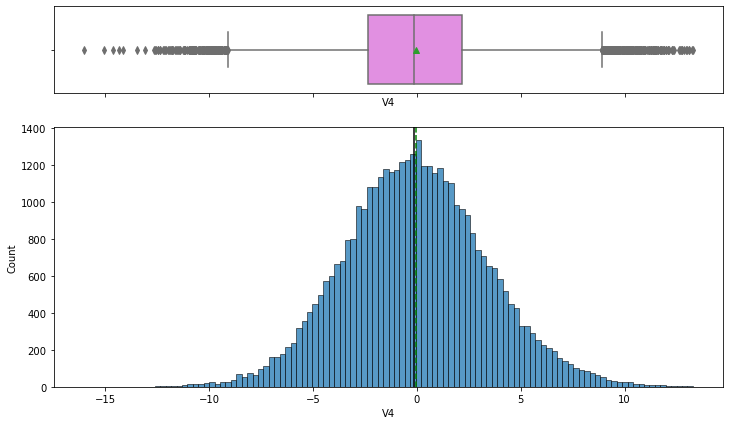

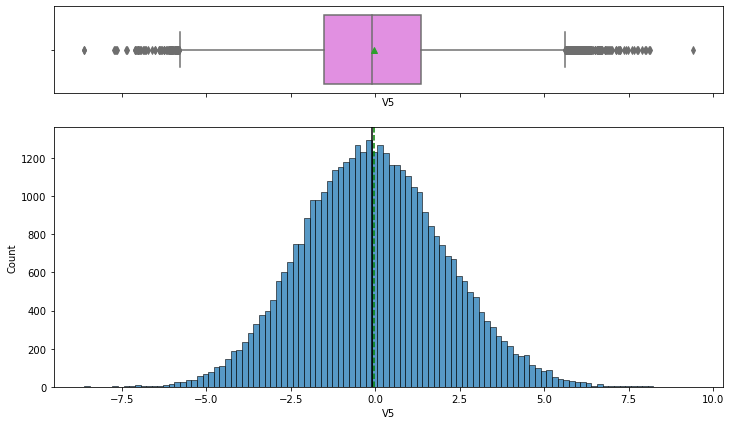

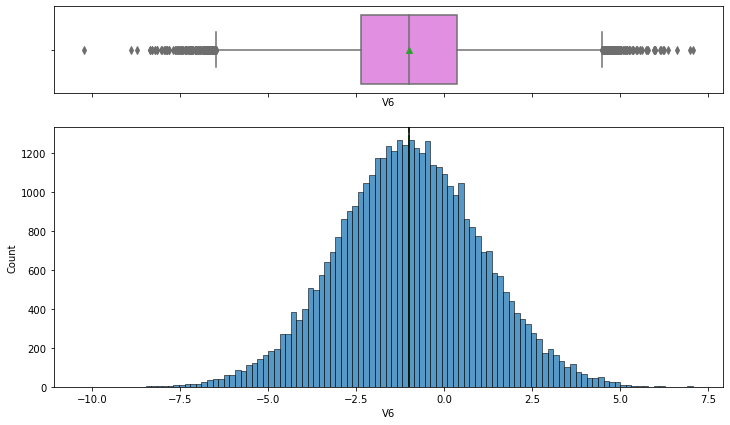

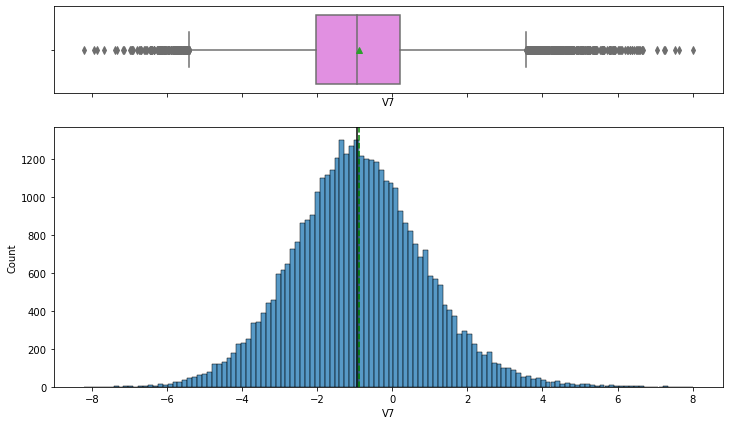

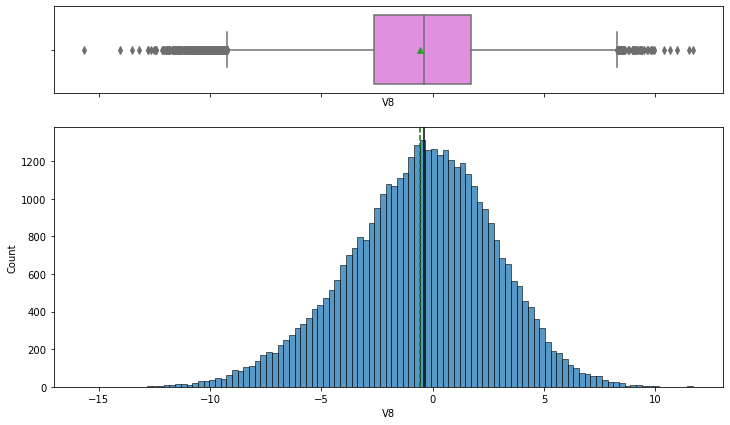

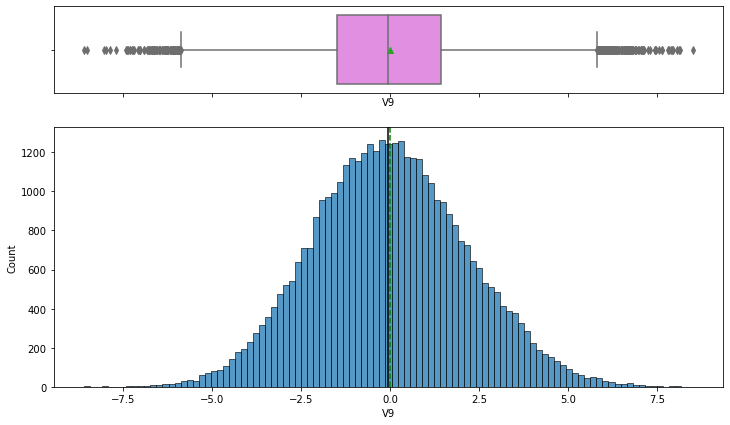

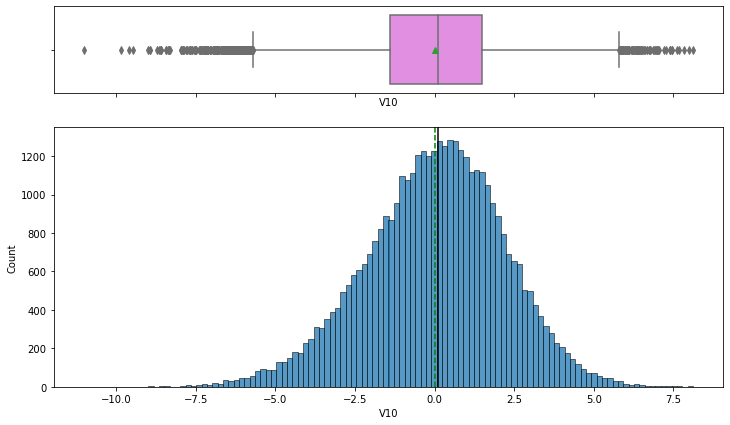

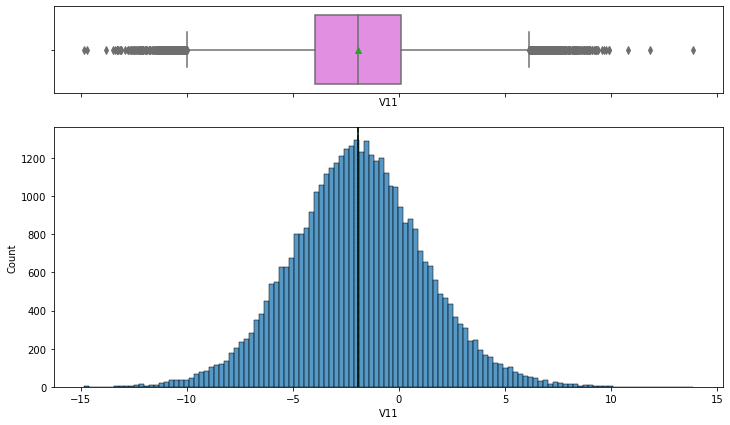

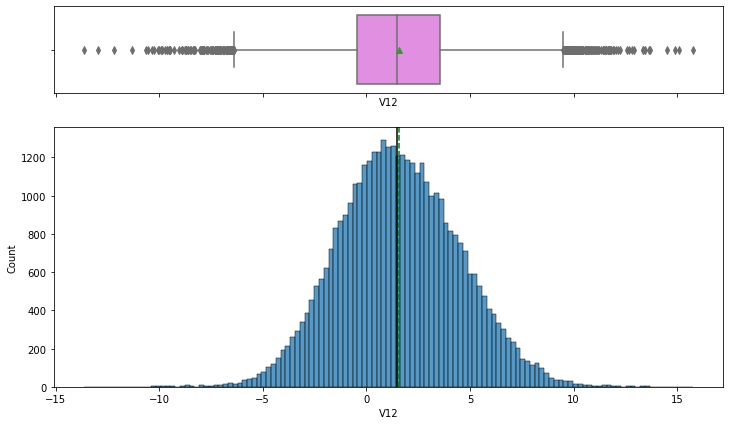

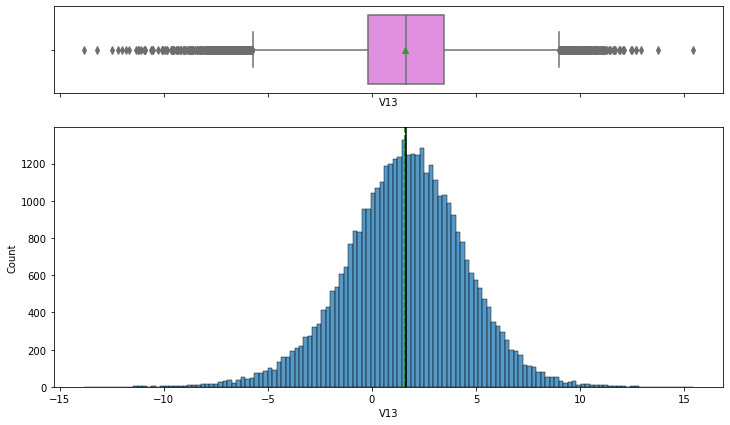

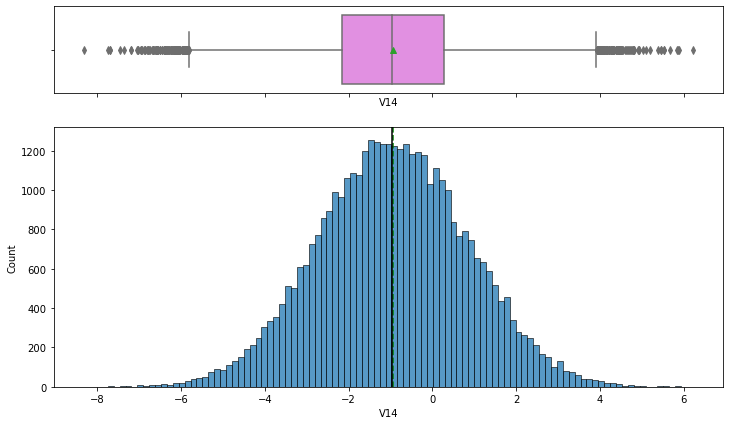

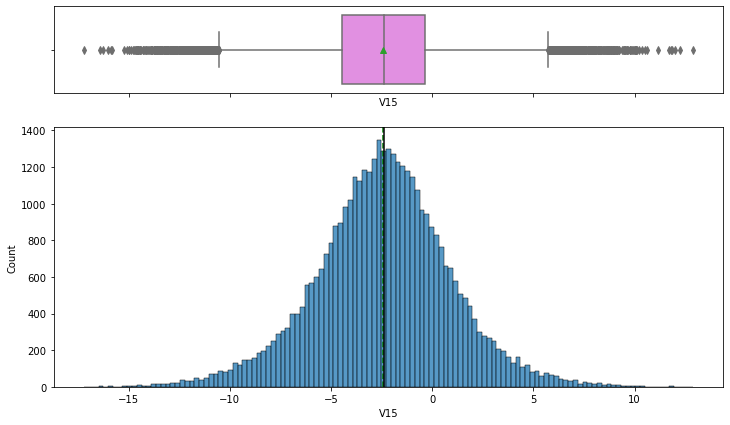

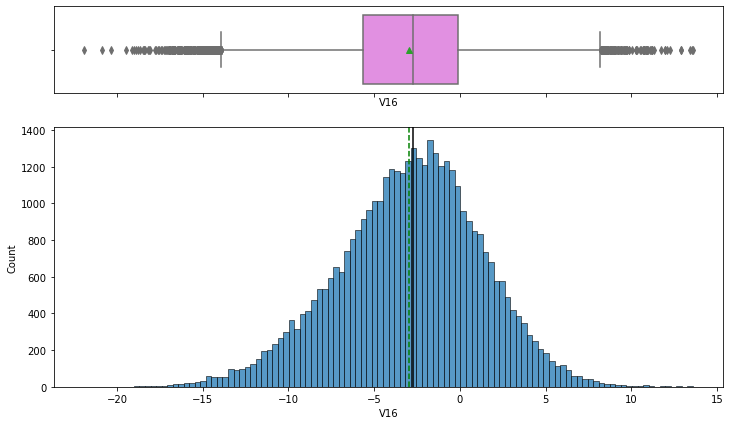

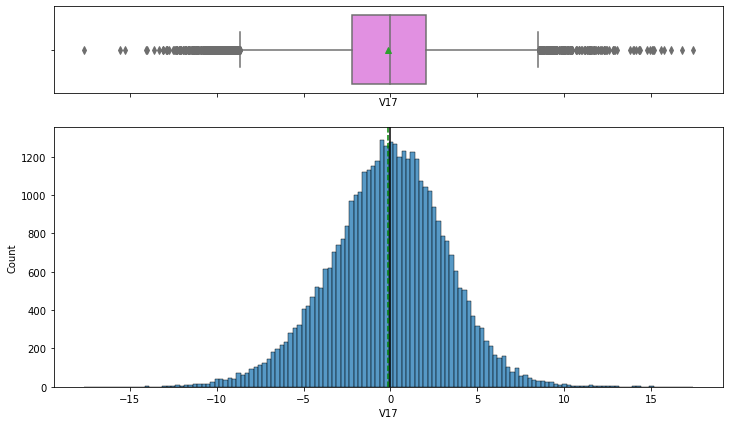

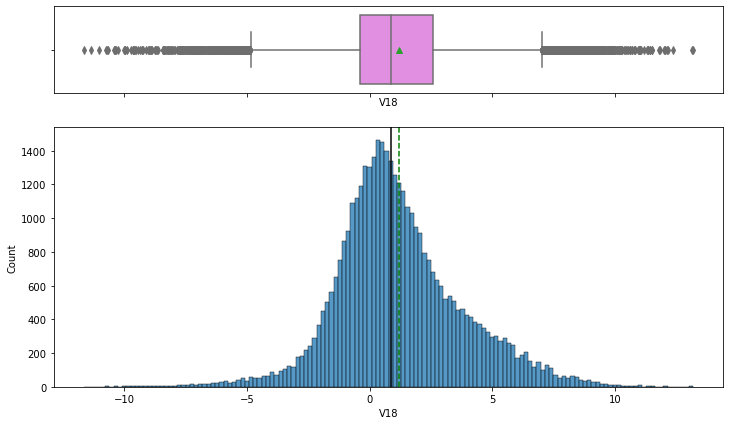

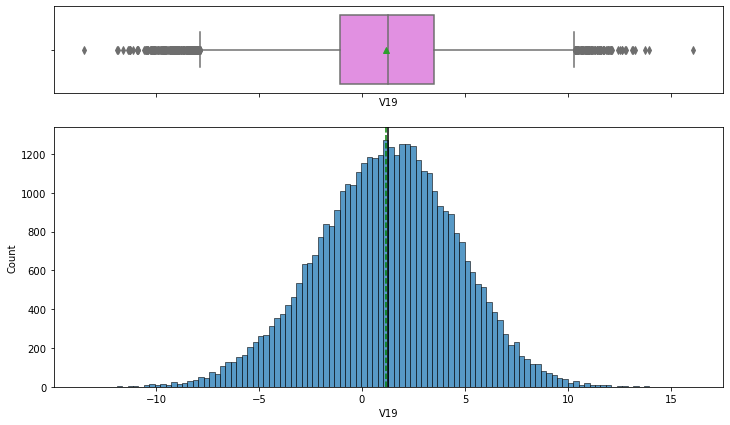

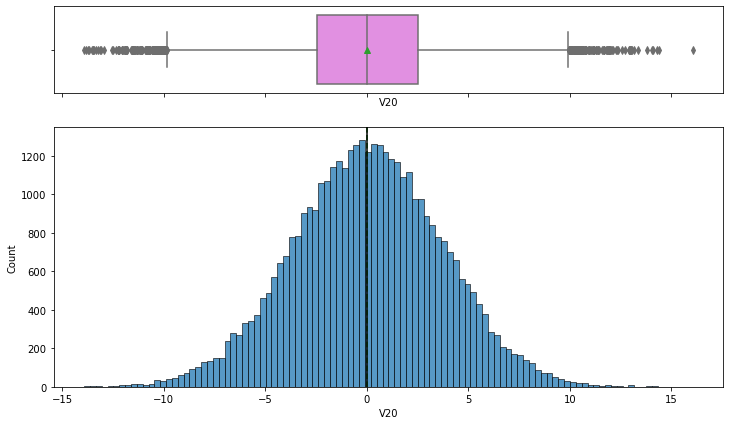

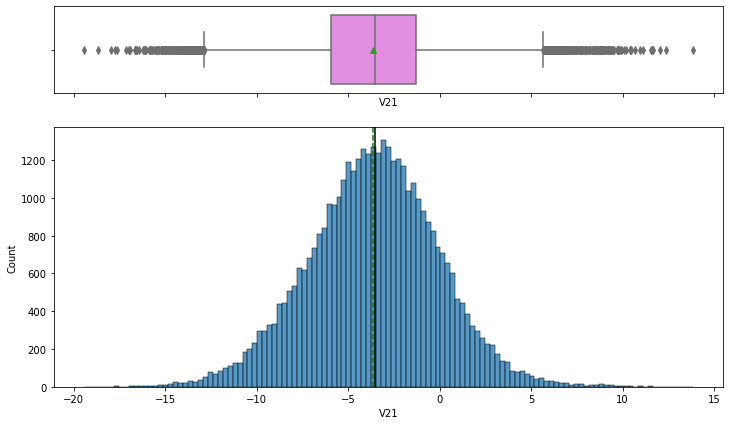

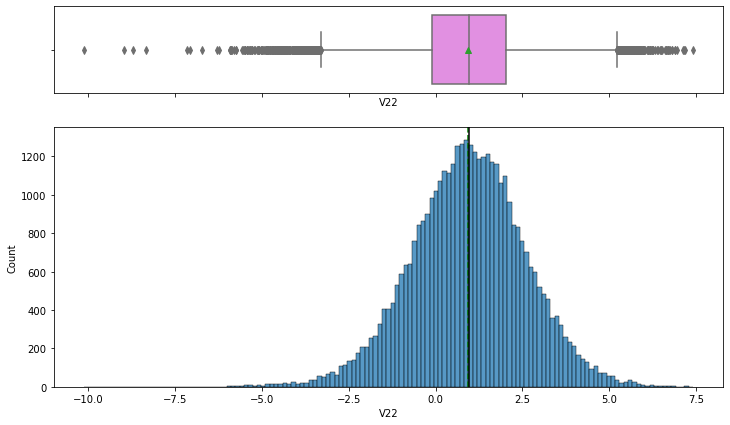

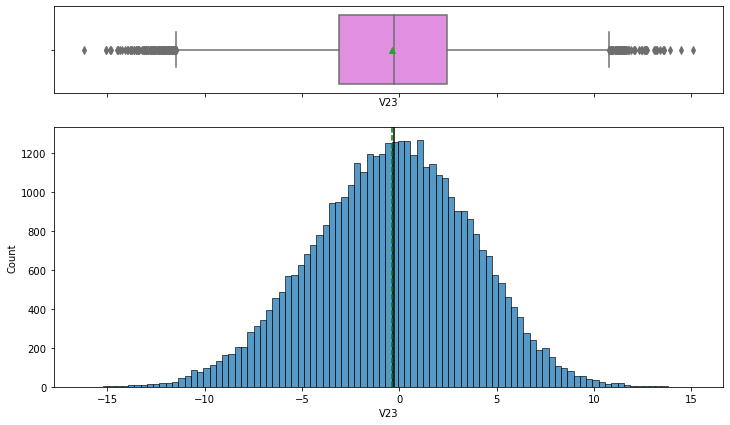

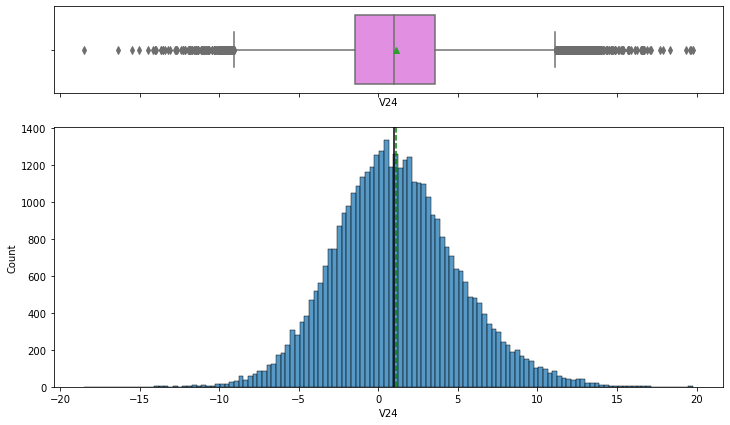

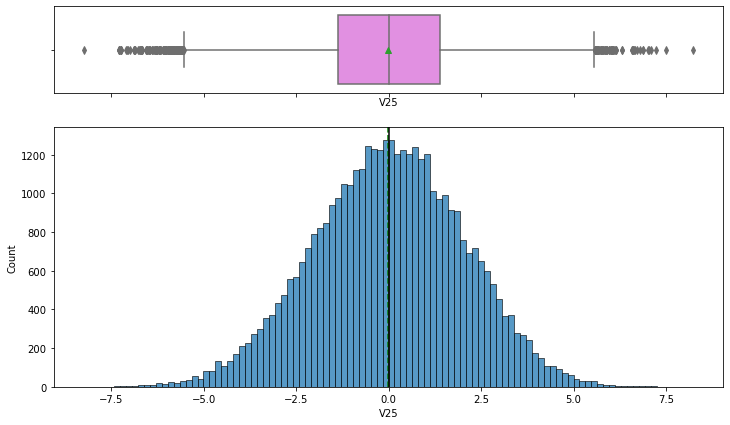

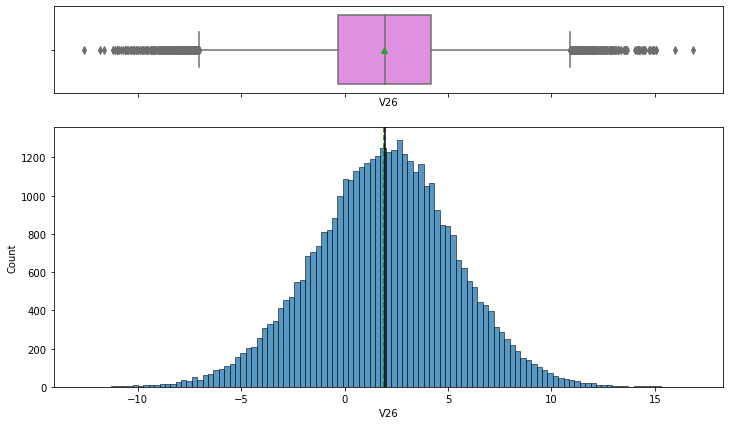

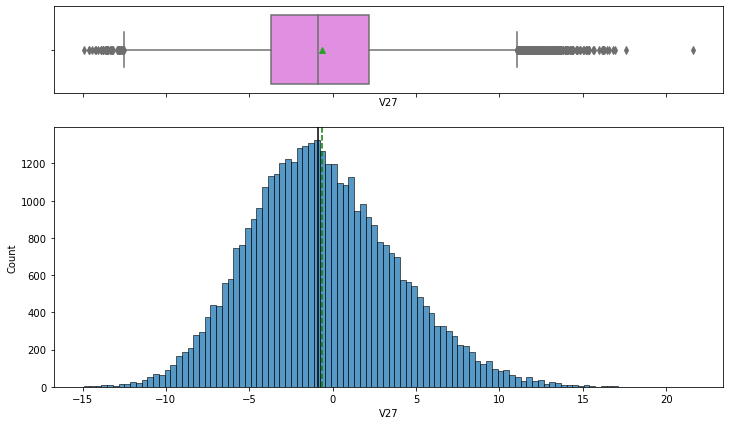

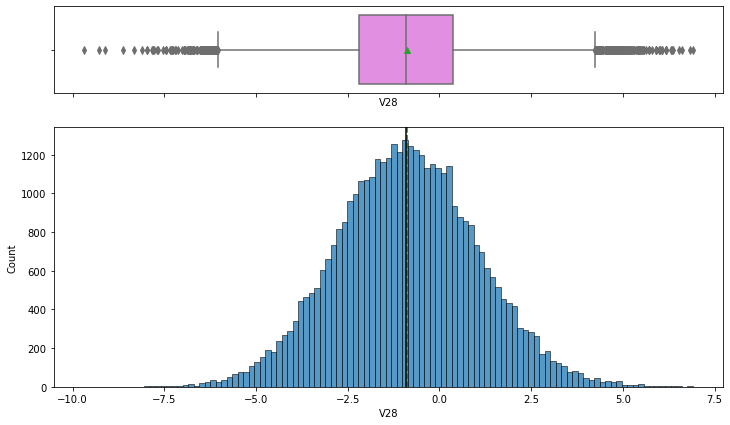

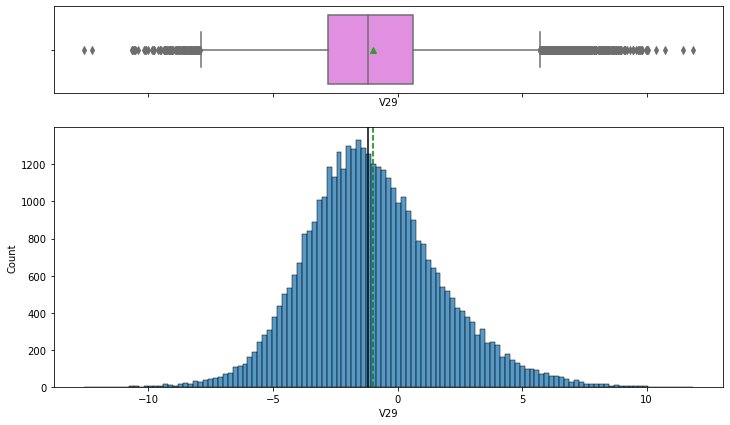

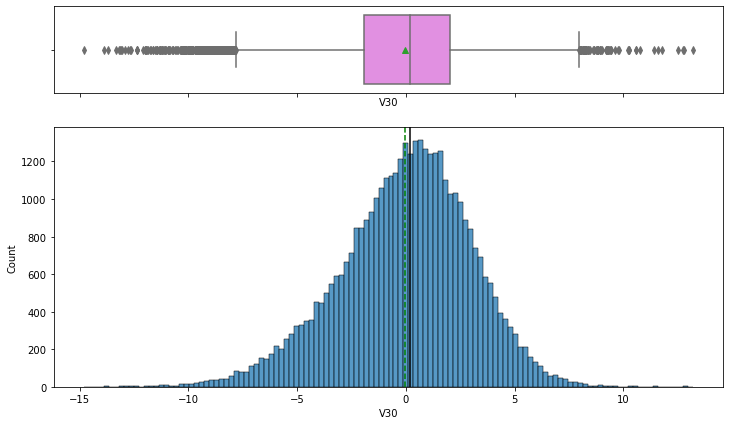

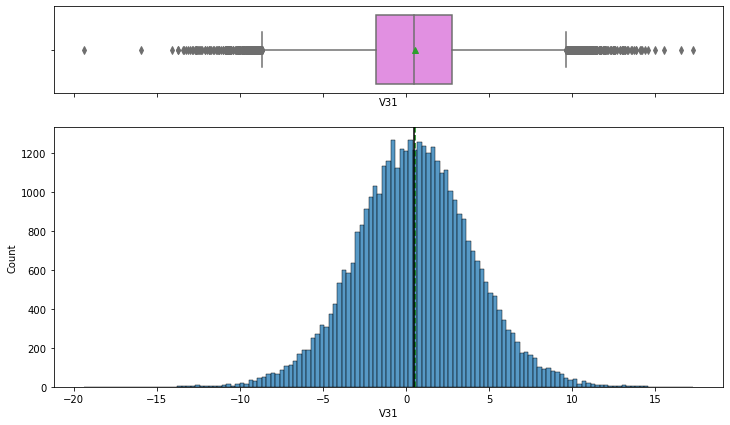

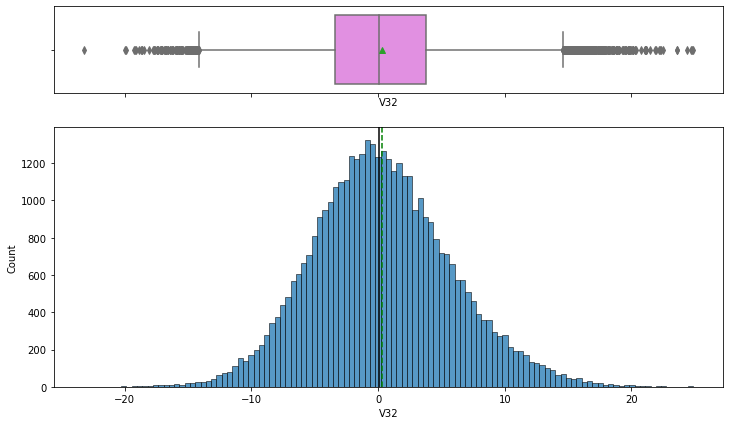

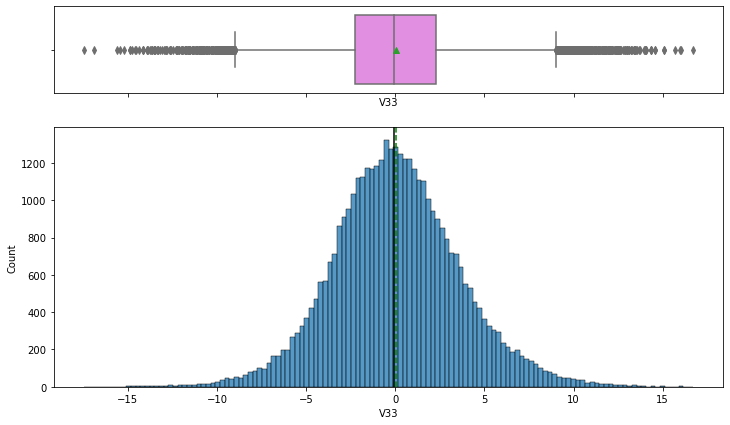

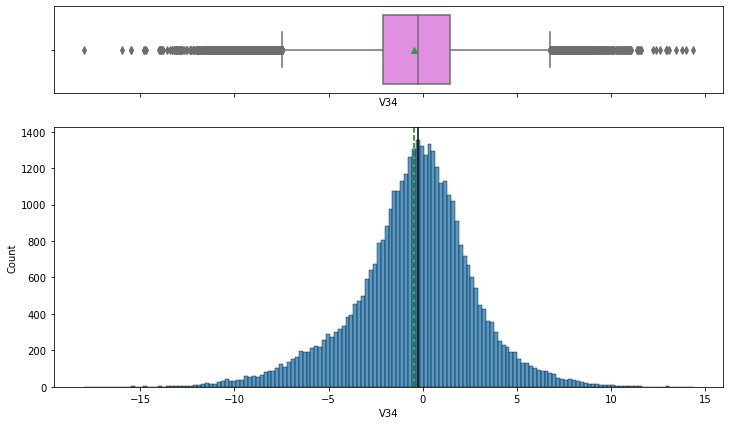

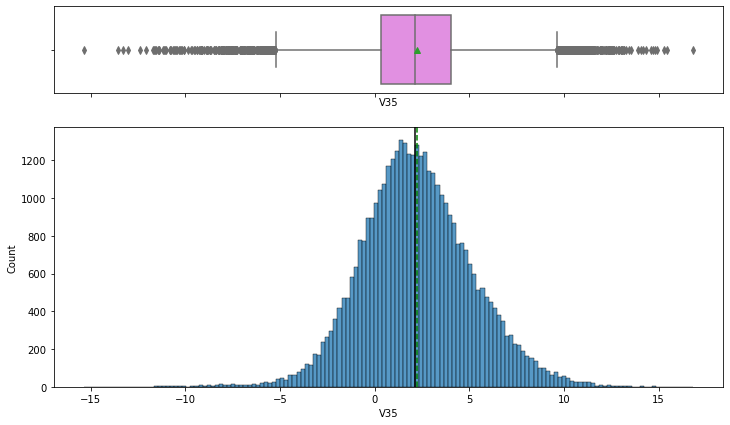

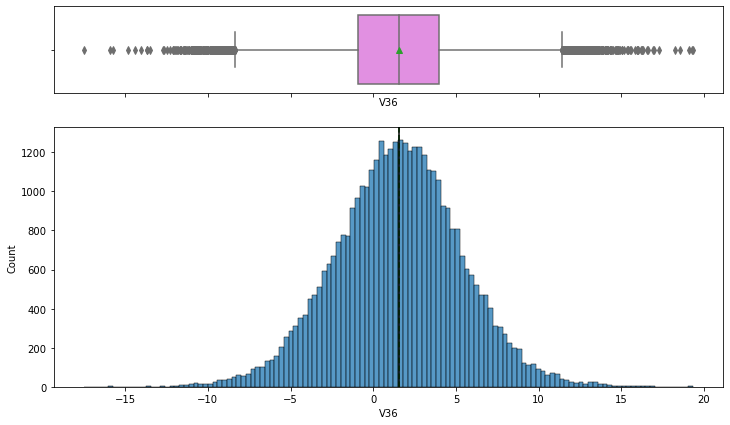

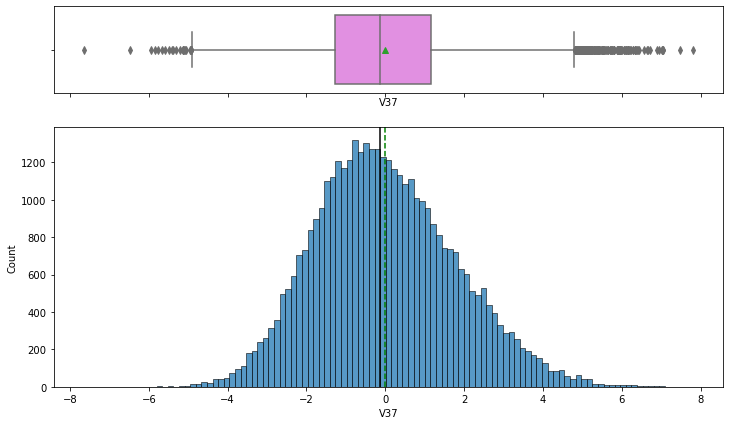

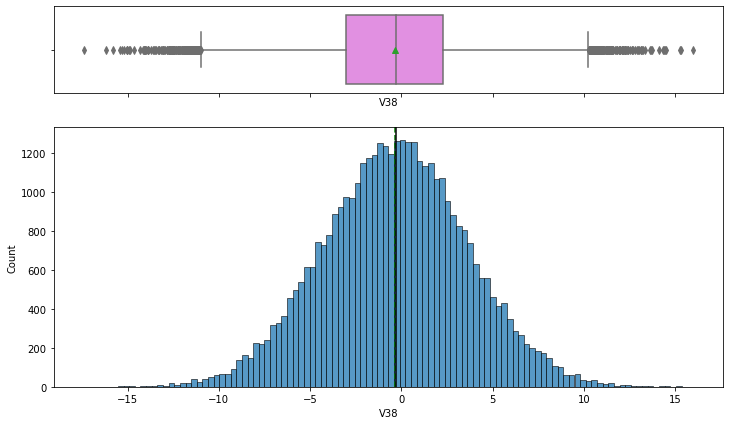

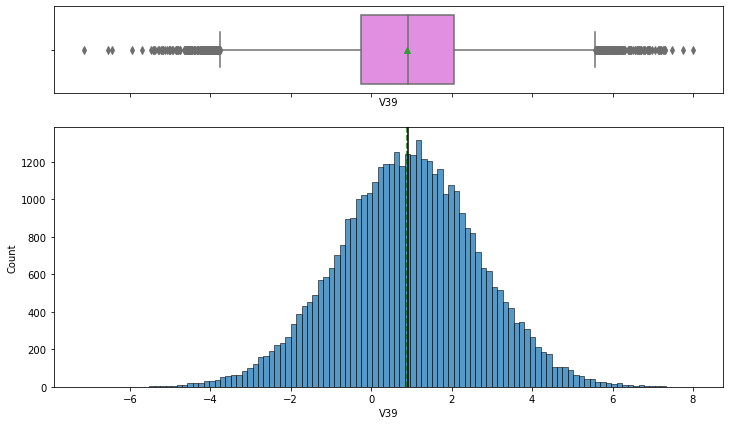

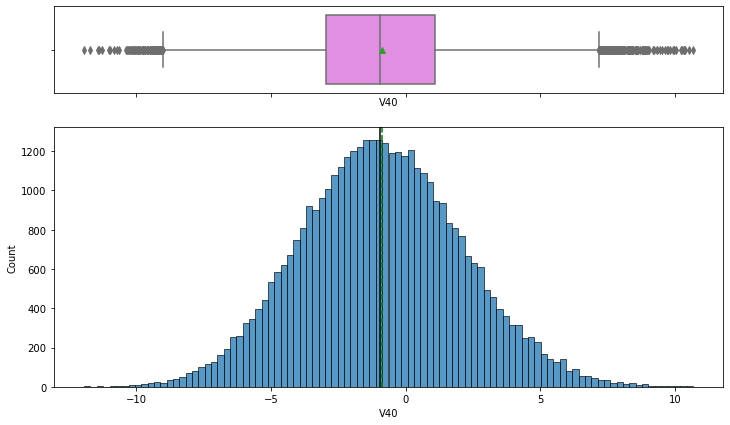

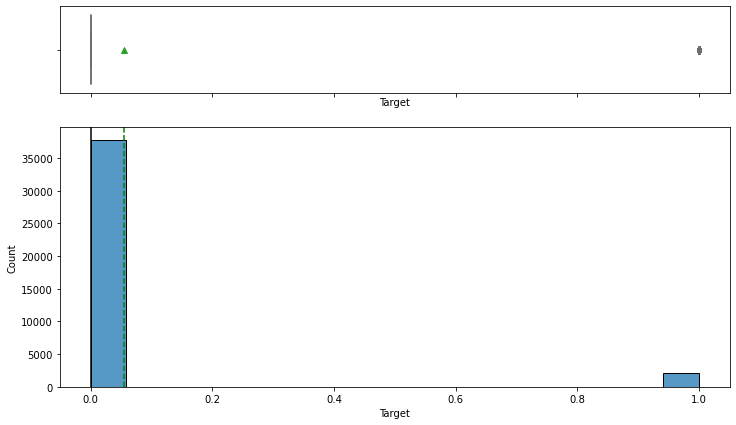

<IPython.core.display.Javascript object>

In [19]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

* All the predictors' distribution range from negative to positive numbers.
* All predictors present outliers on bothe ends of the distribution. But outliers are "balanced' on both sides.
* Despite the outliers, all prediscotrs look normally distributed. Some of them are a bit right or left skeweded but not too much.

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

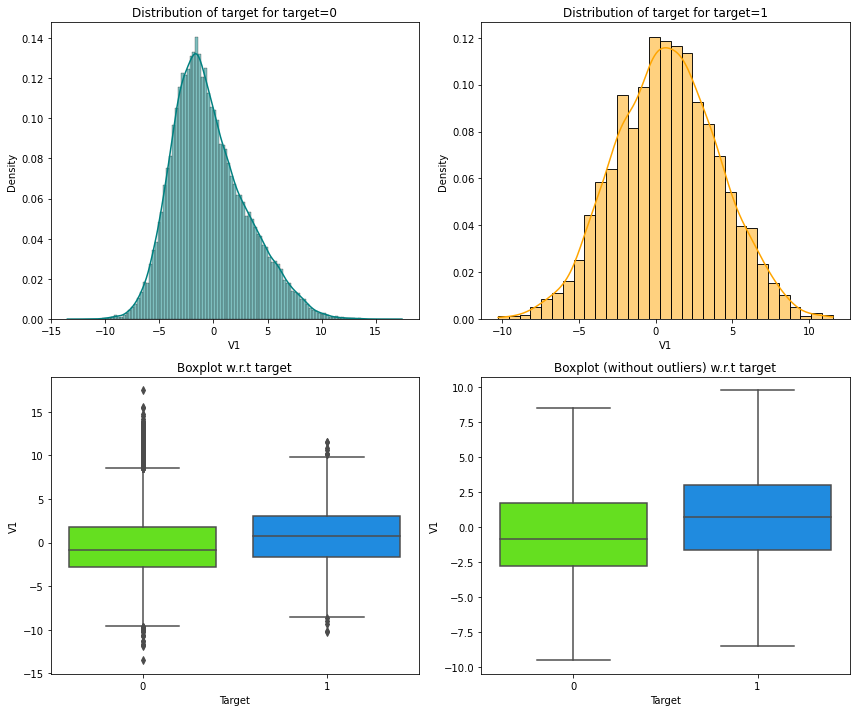

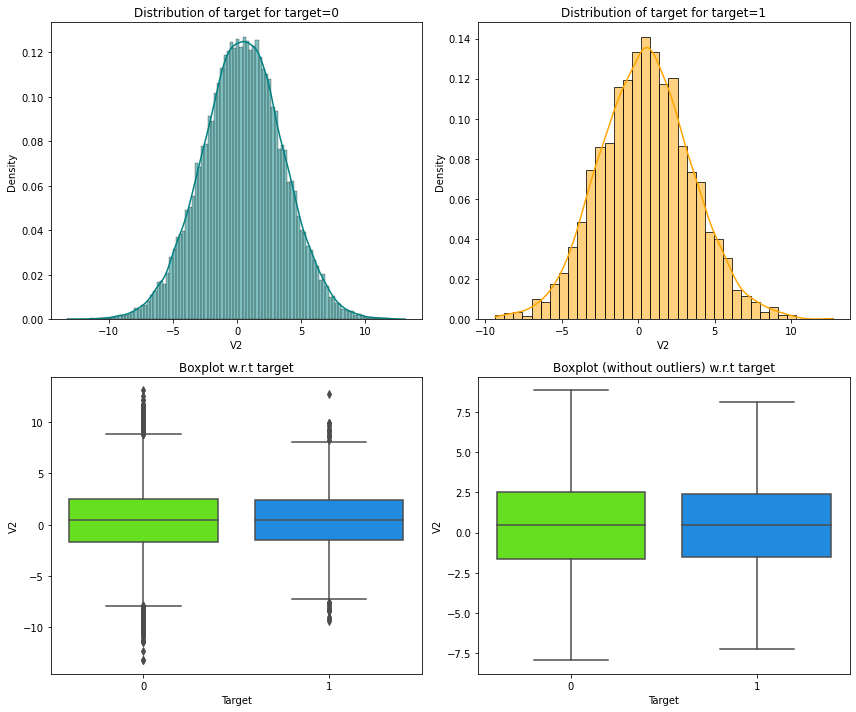

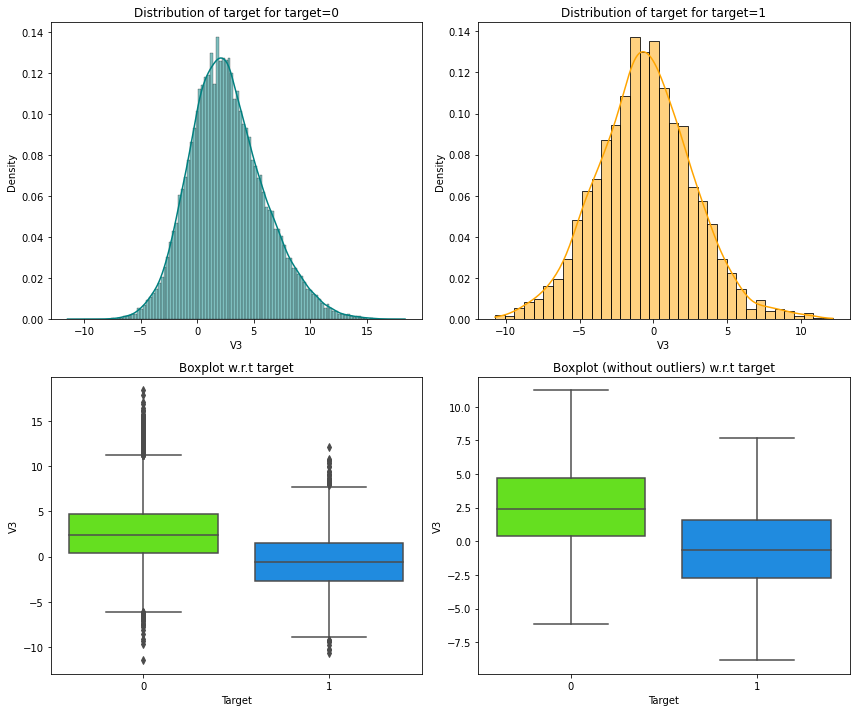

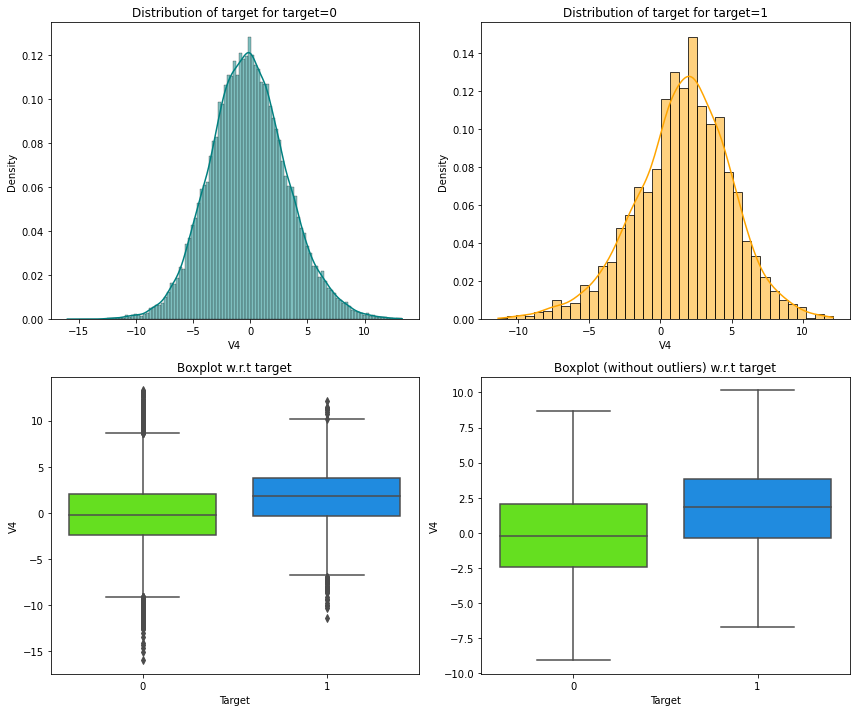

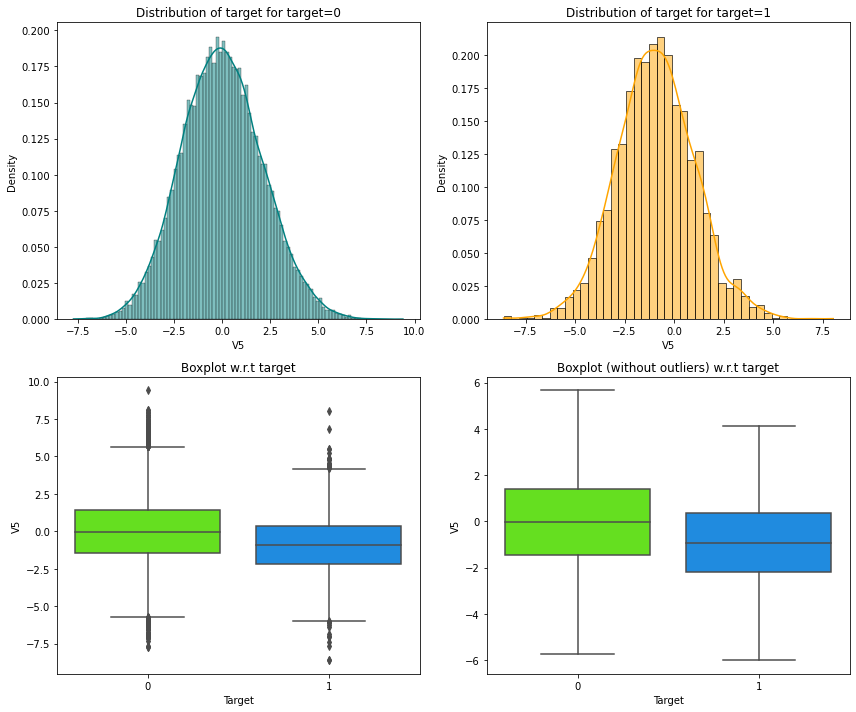

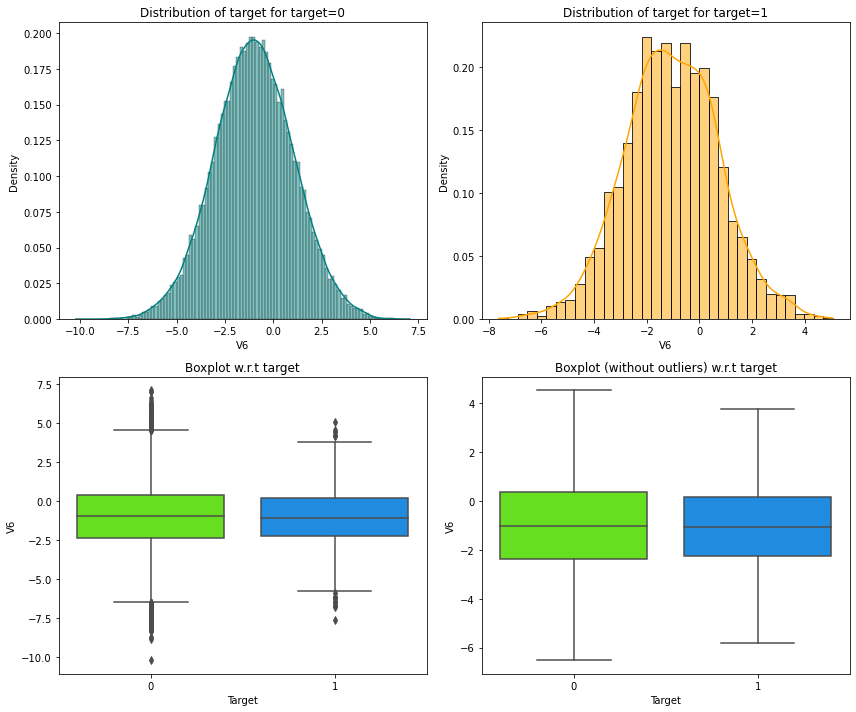

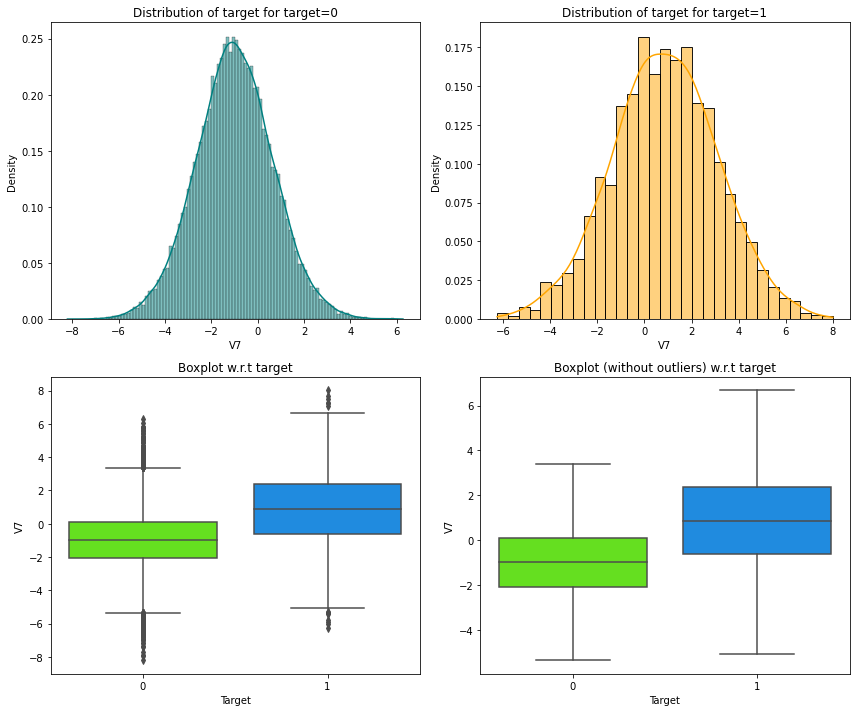

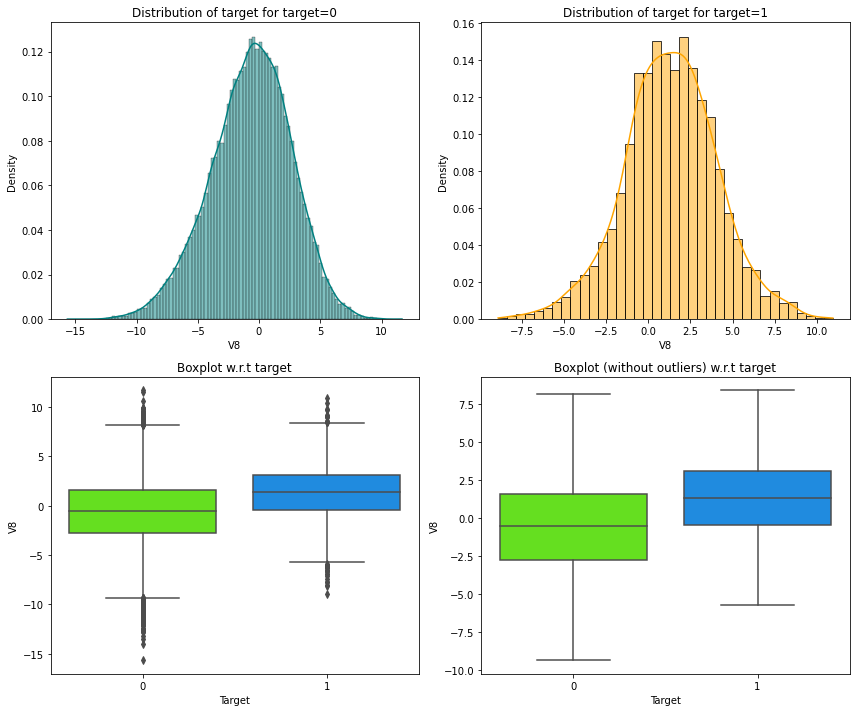

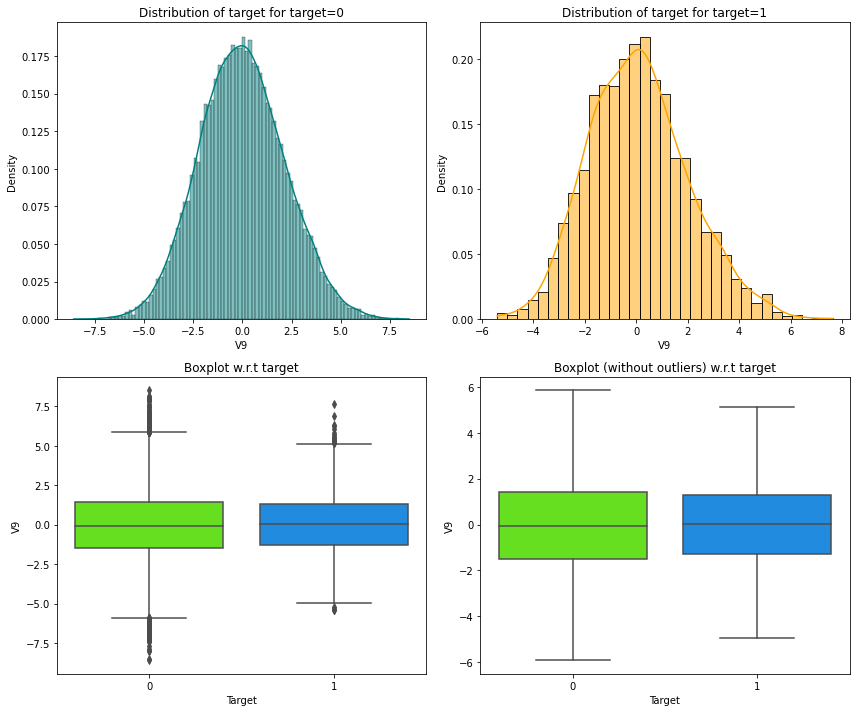

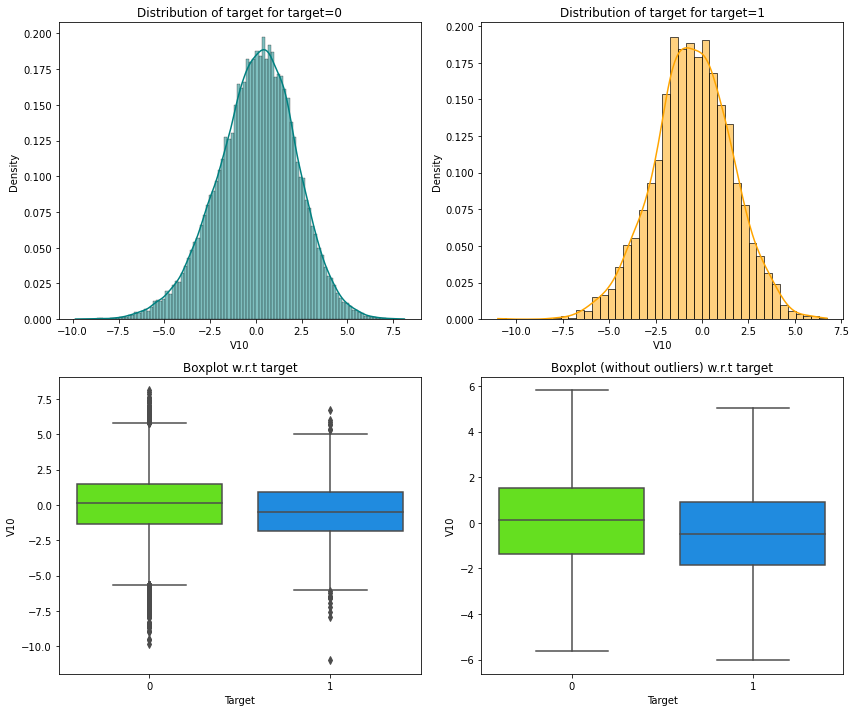

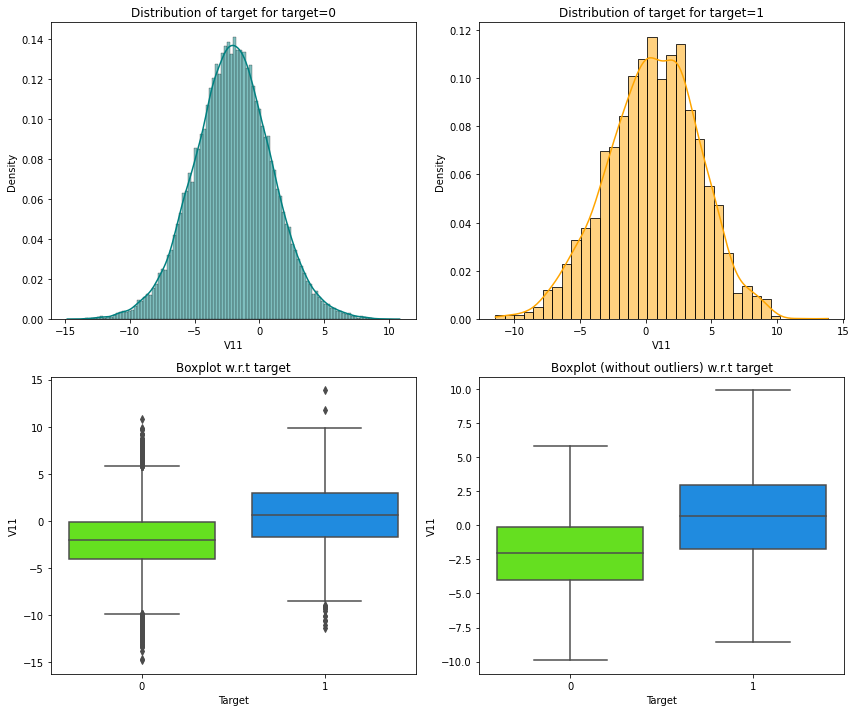

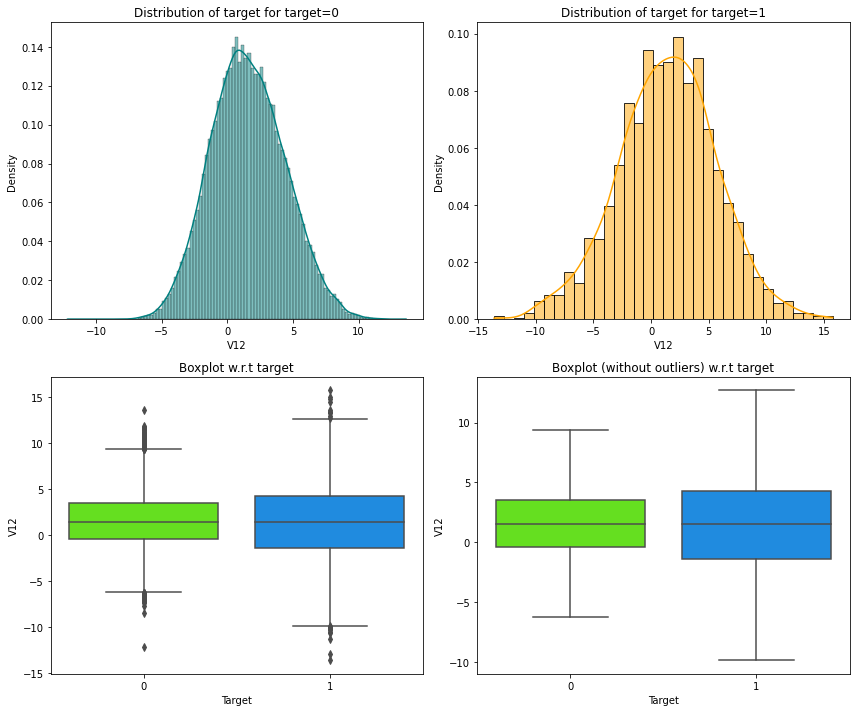

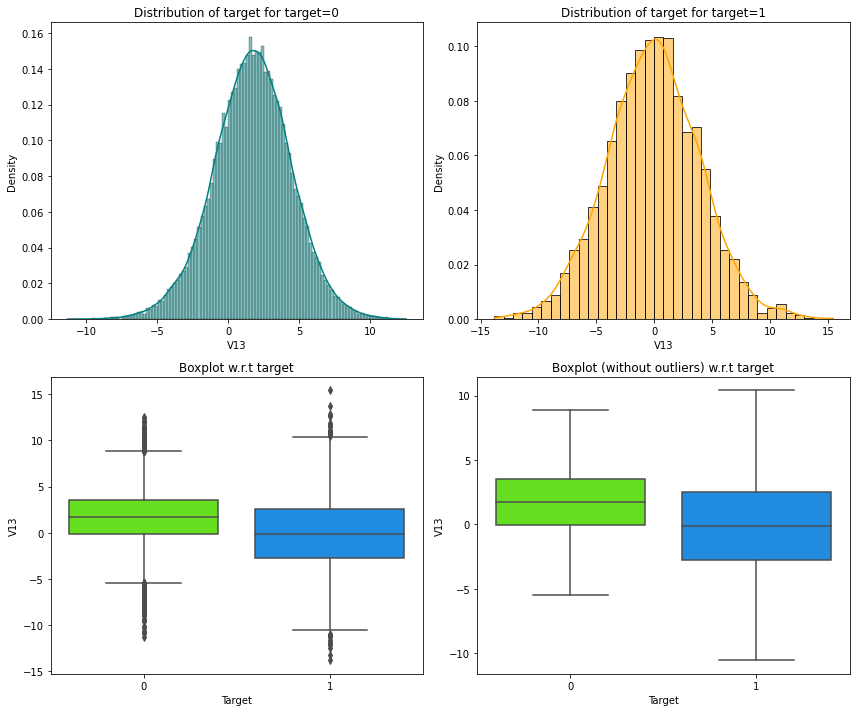

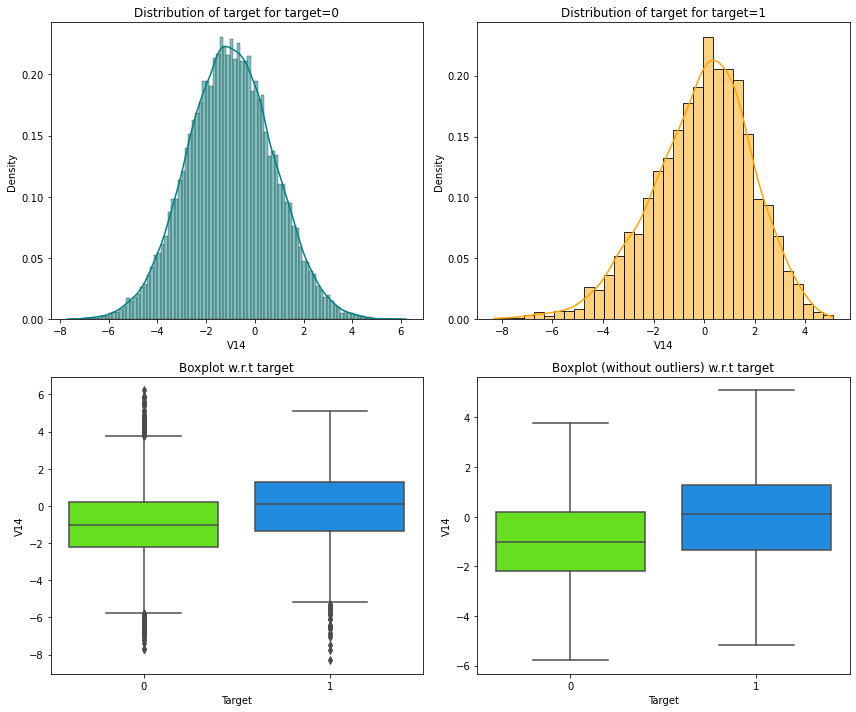

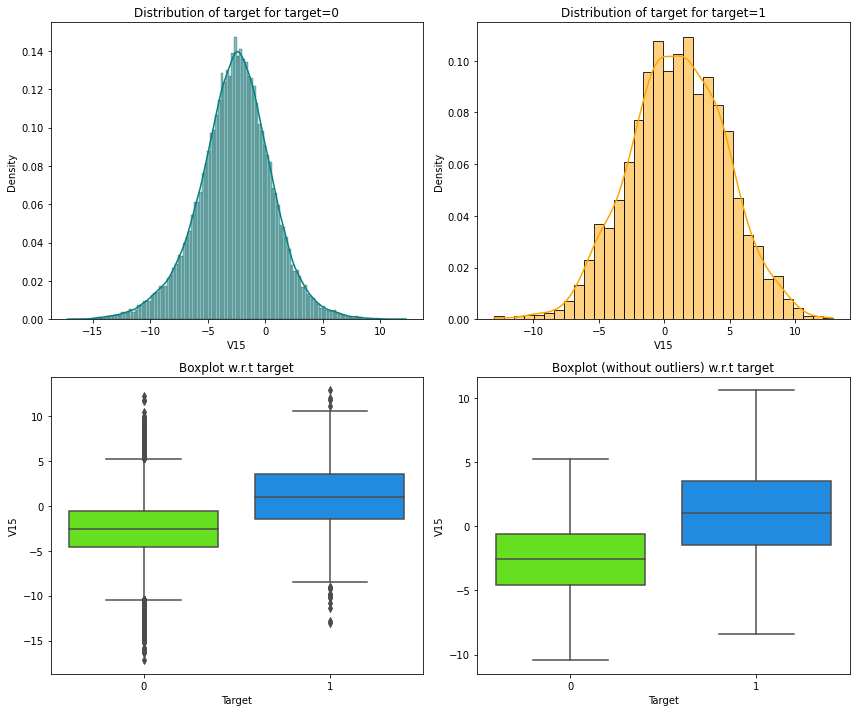

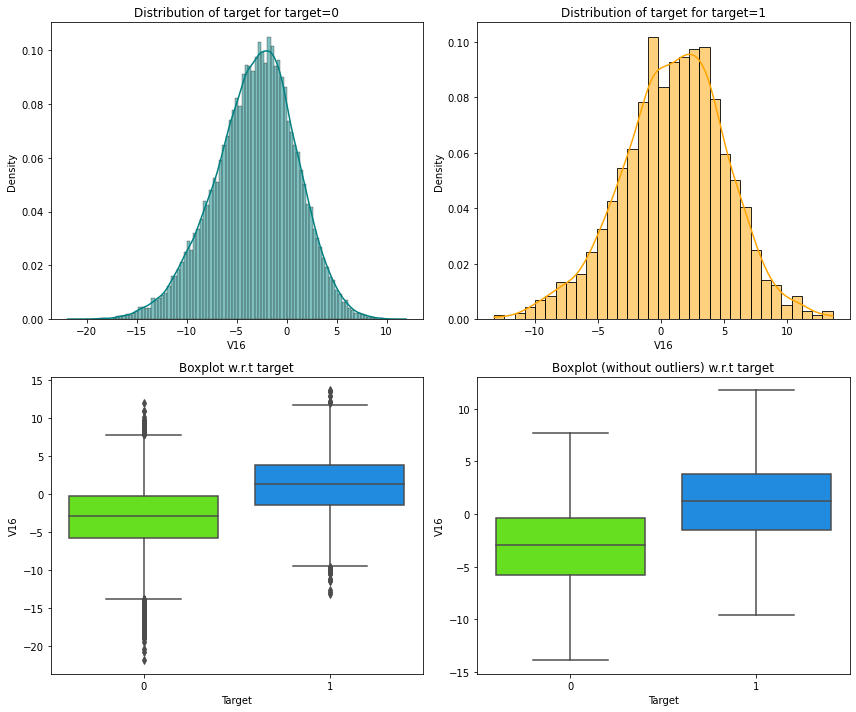

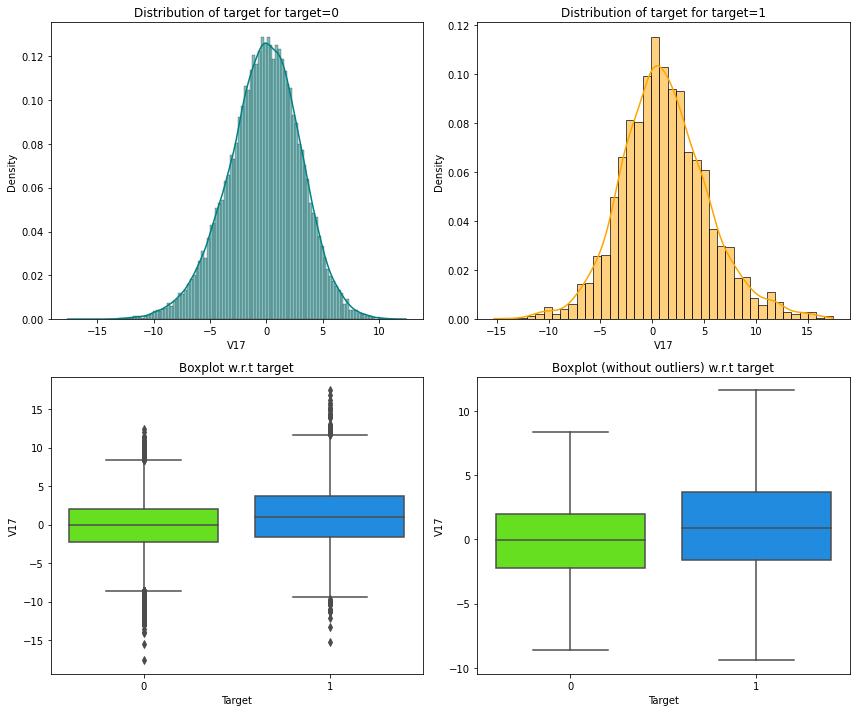

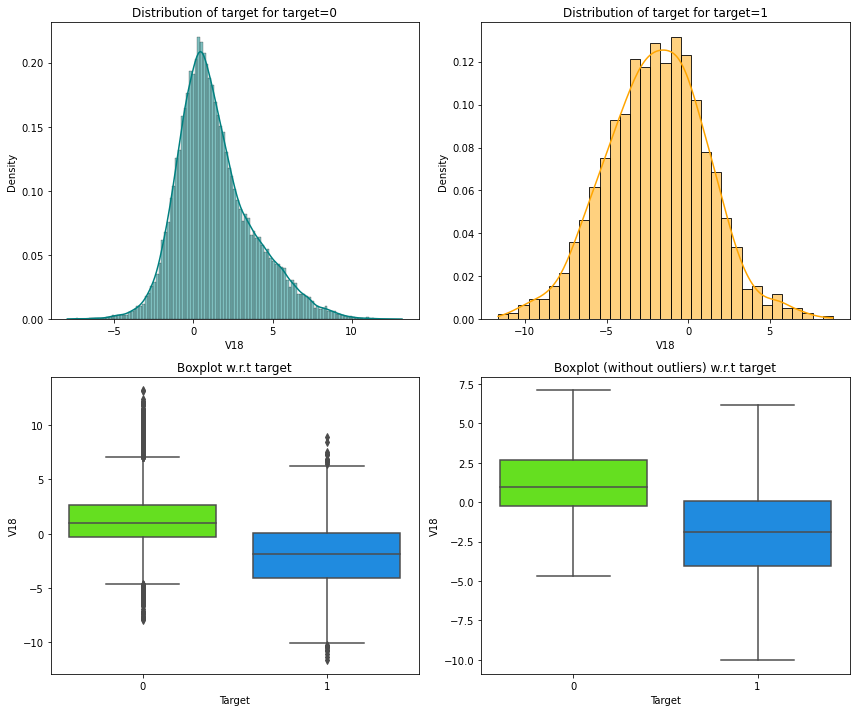

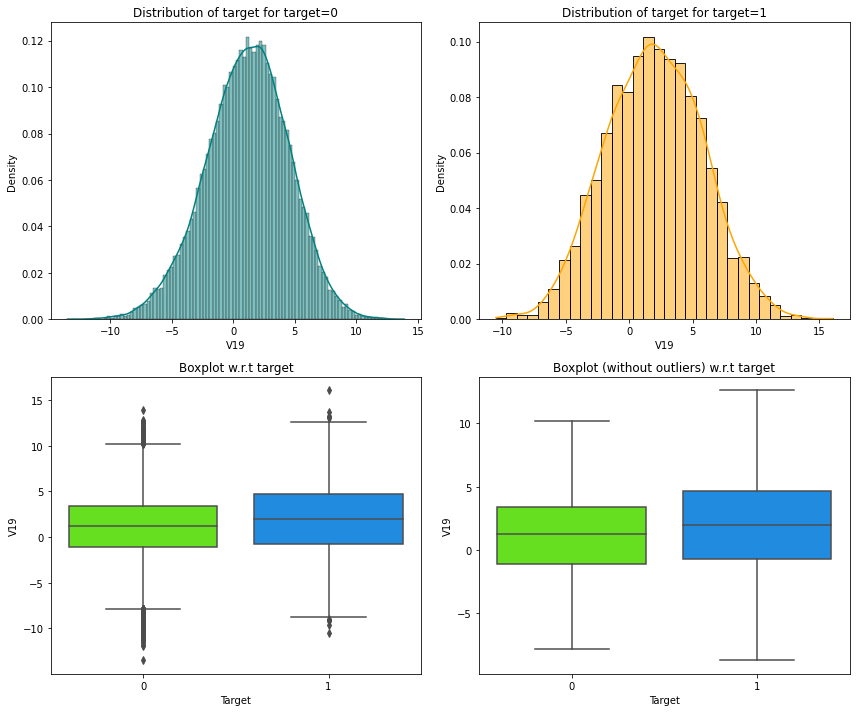

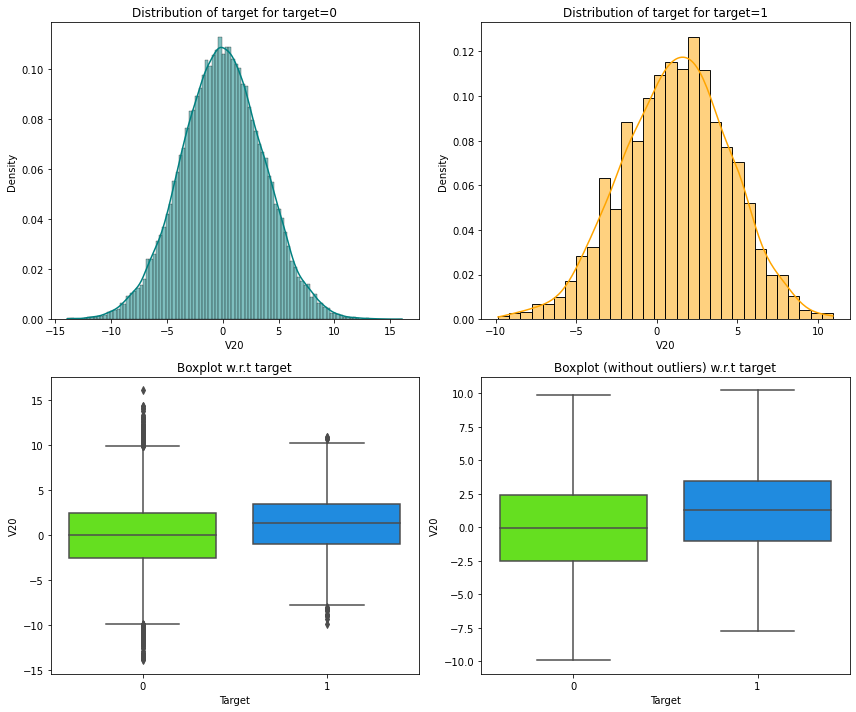

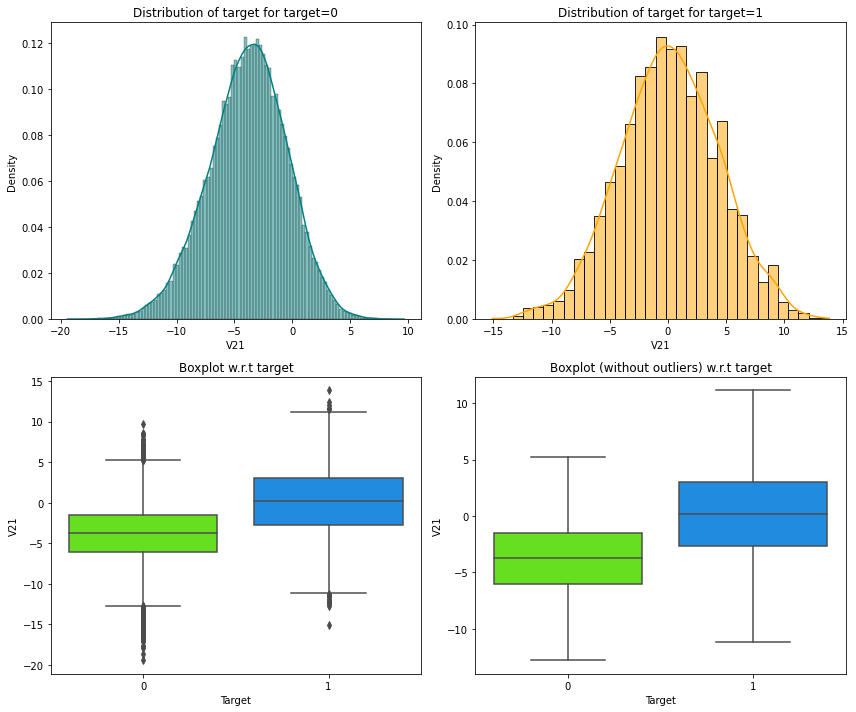

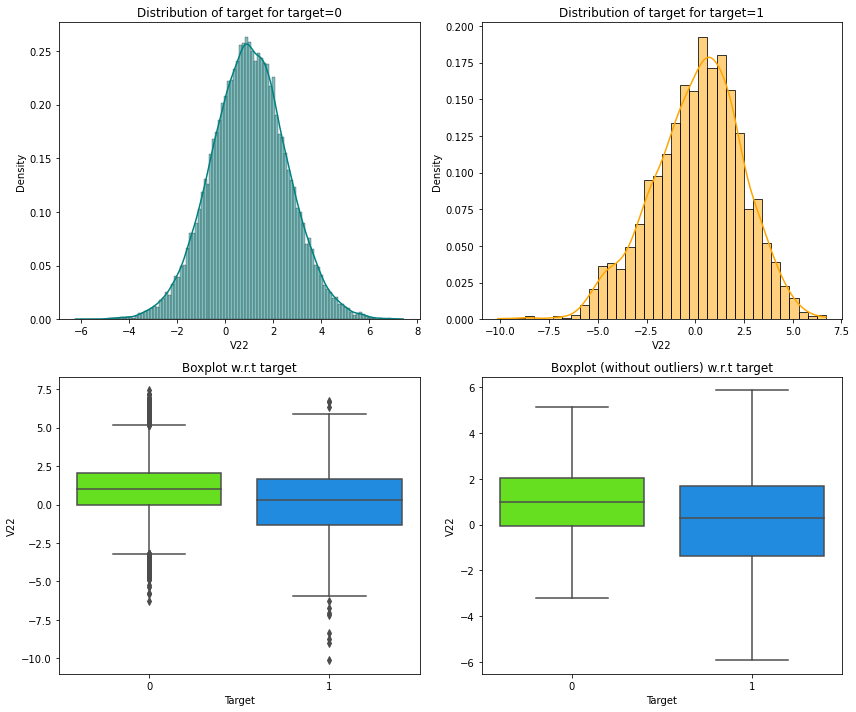

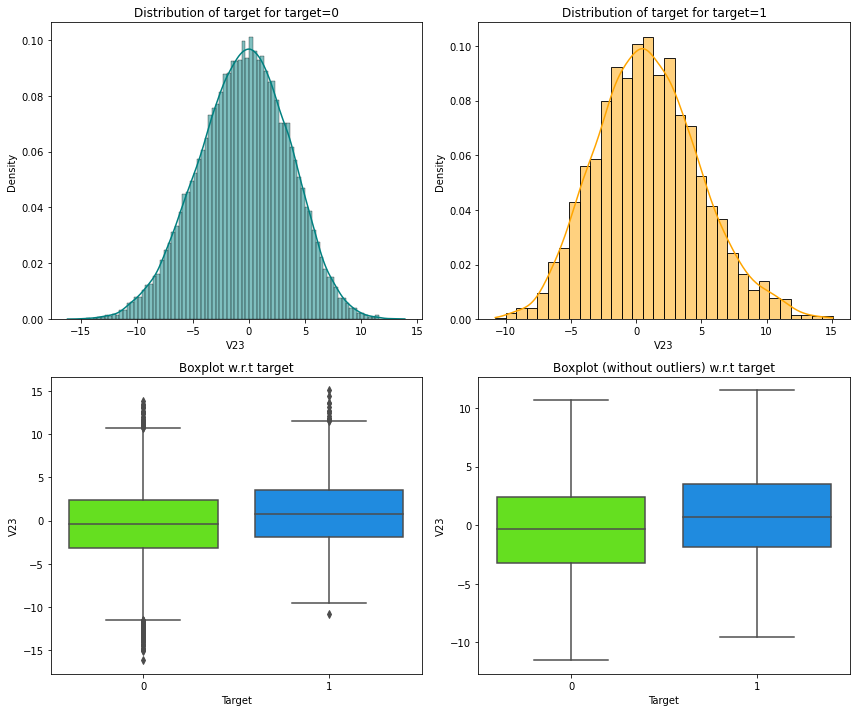

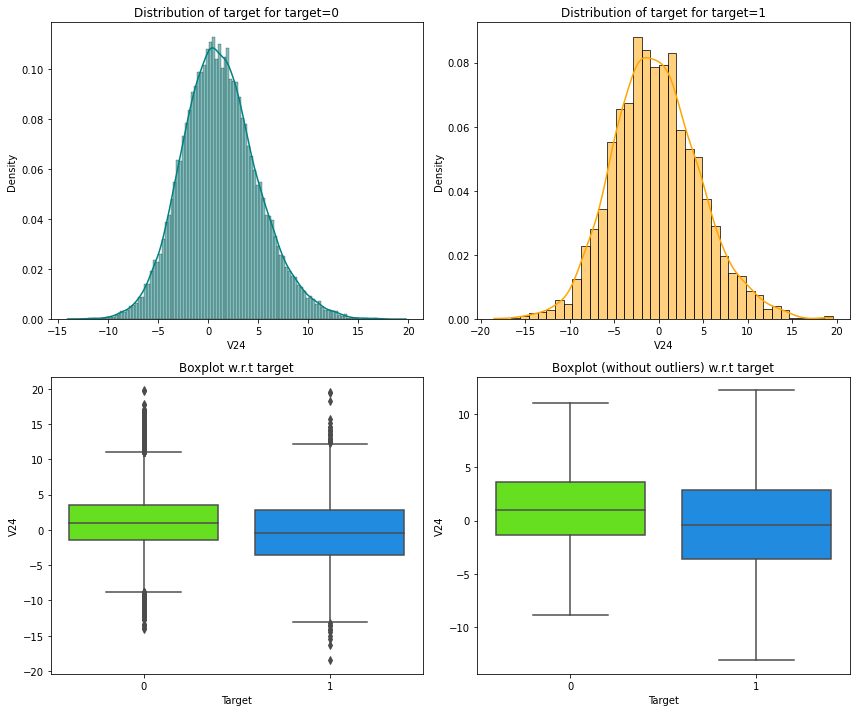

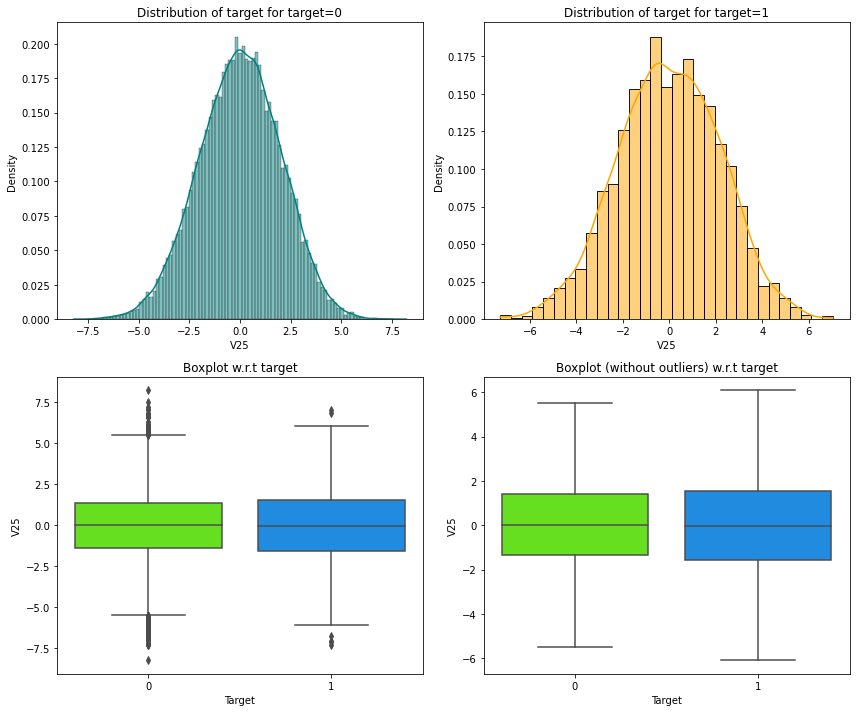

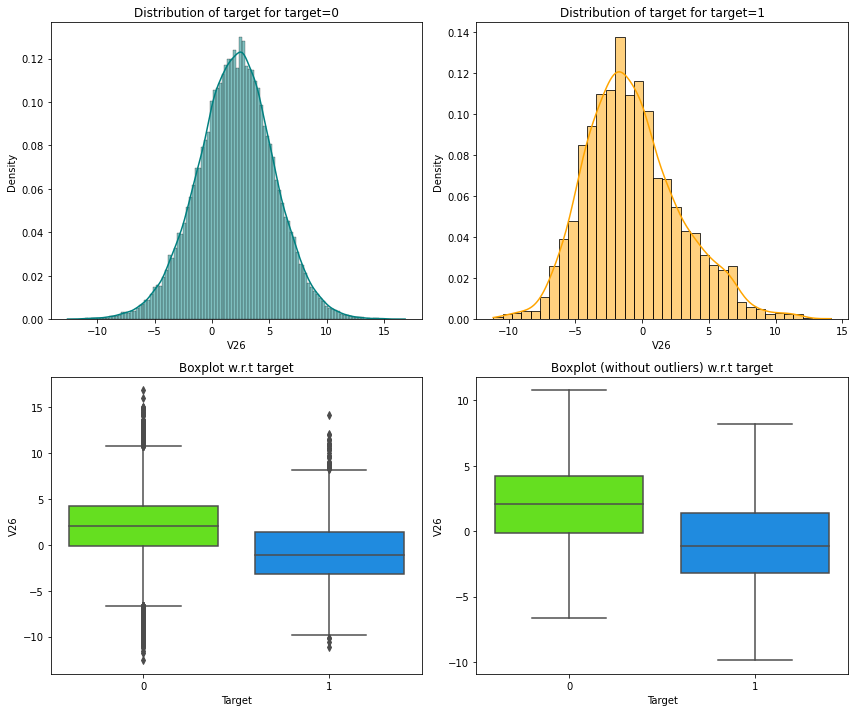

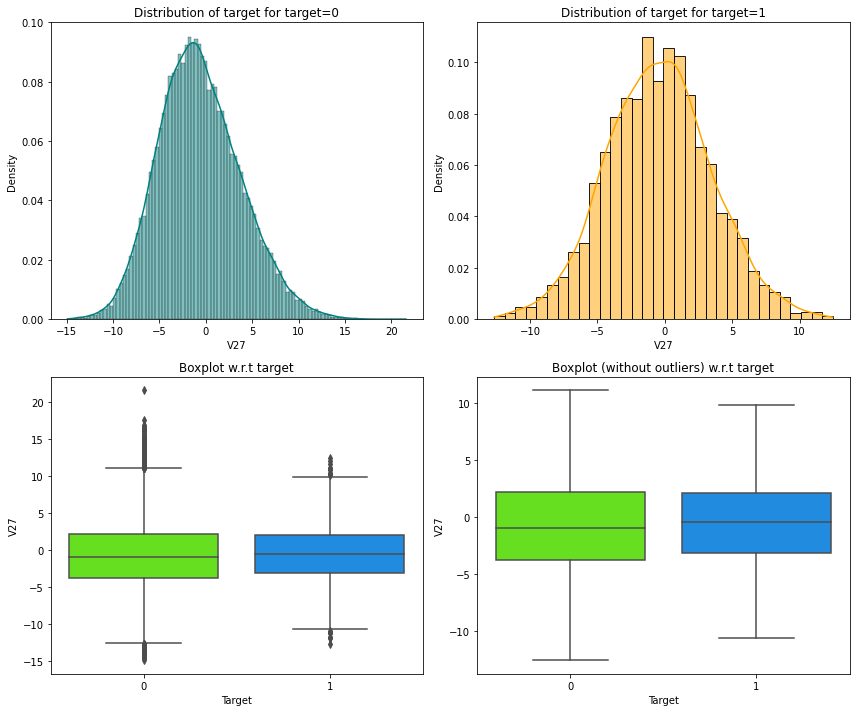

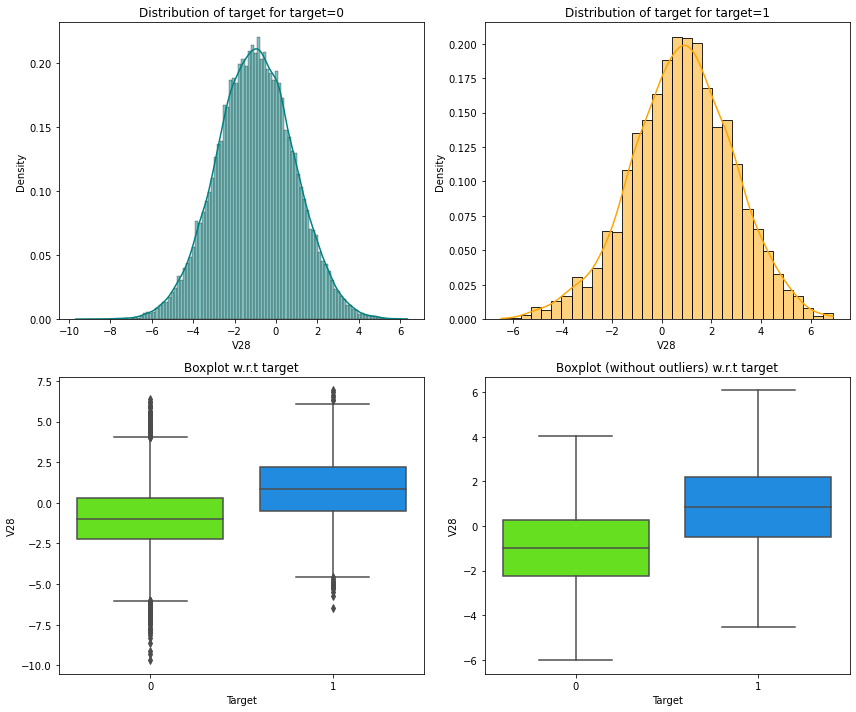

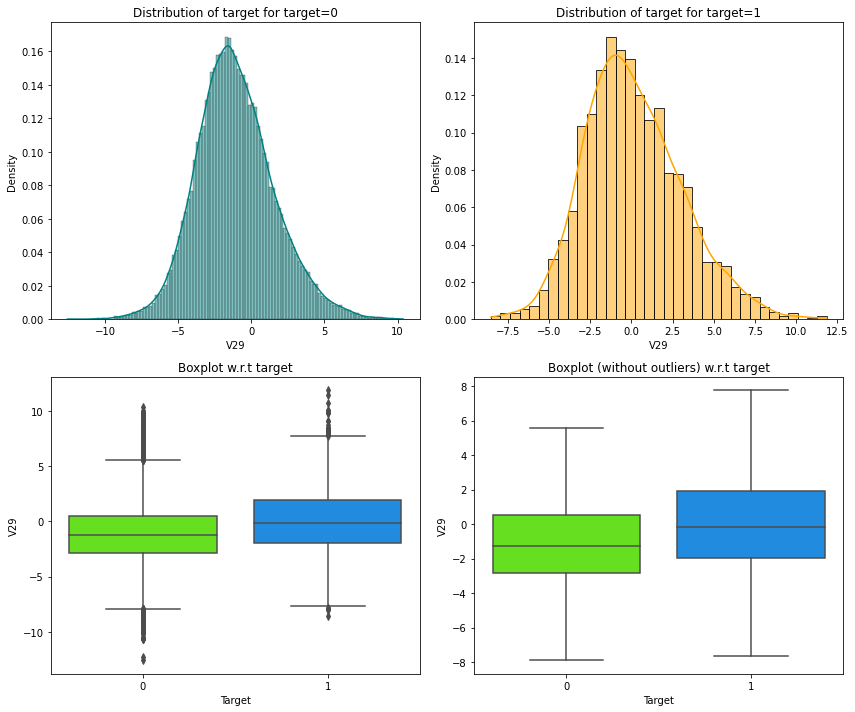

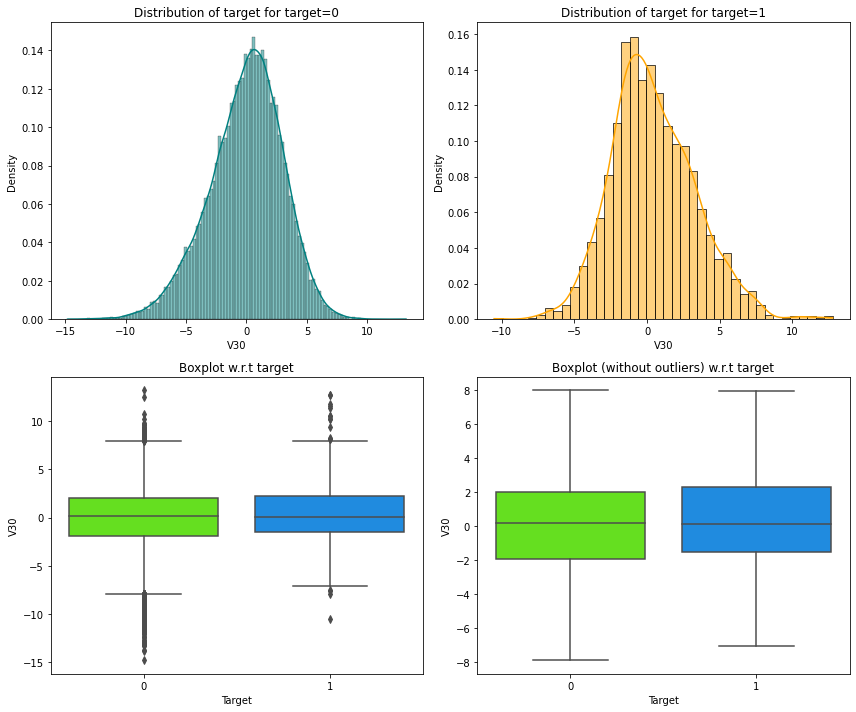

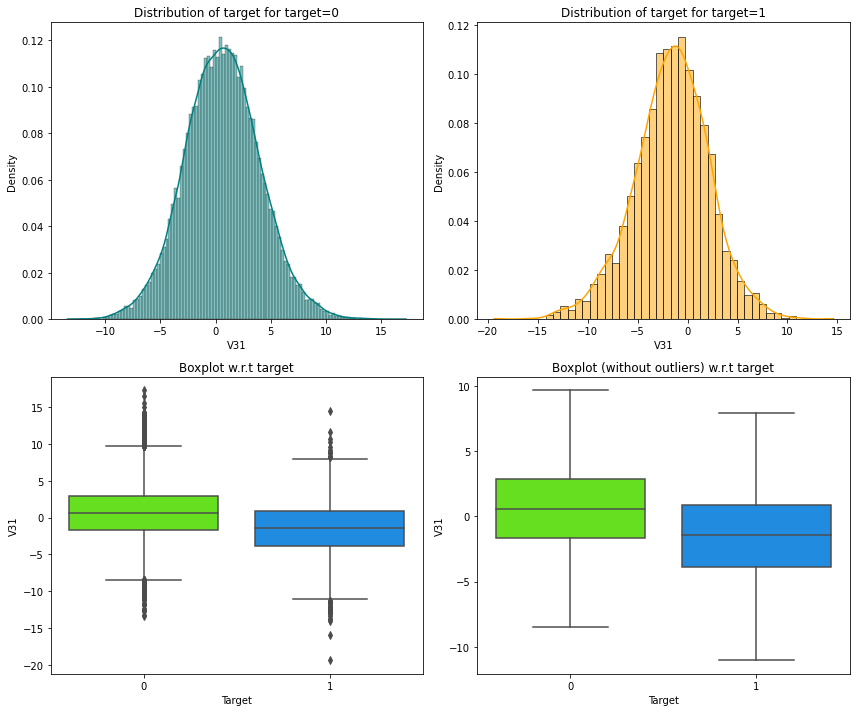

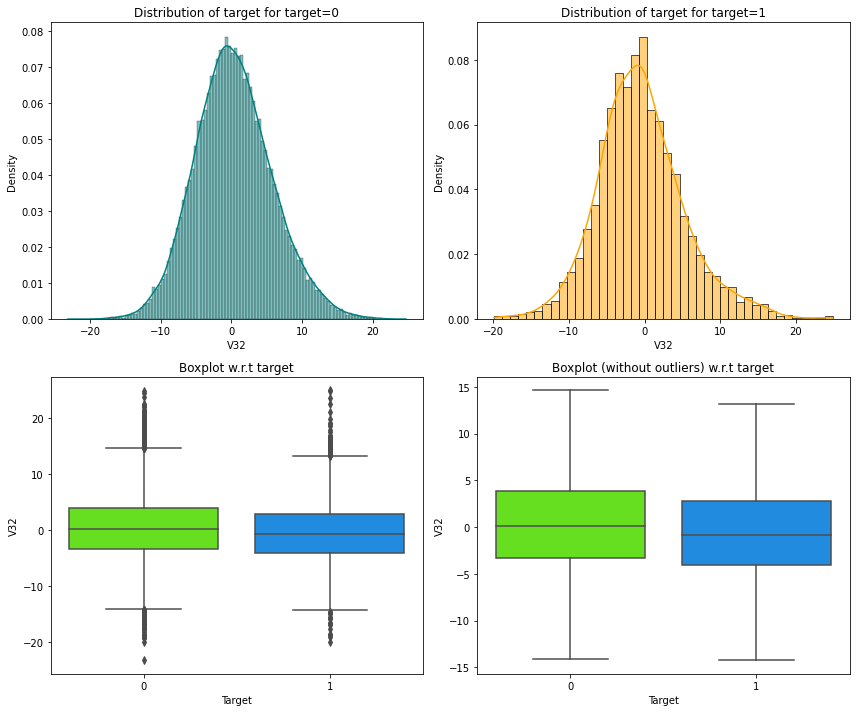

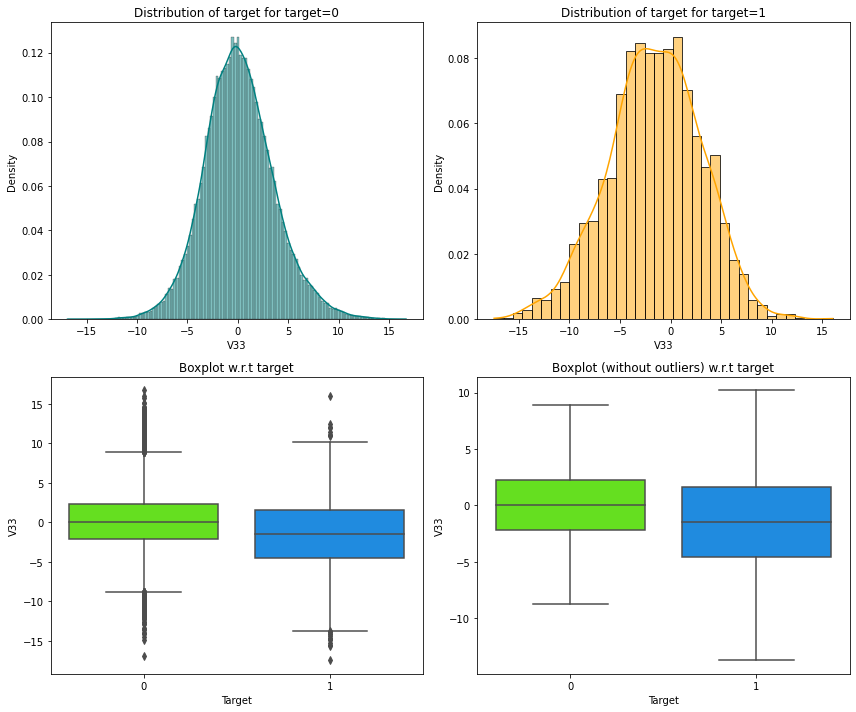

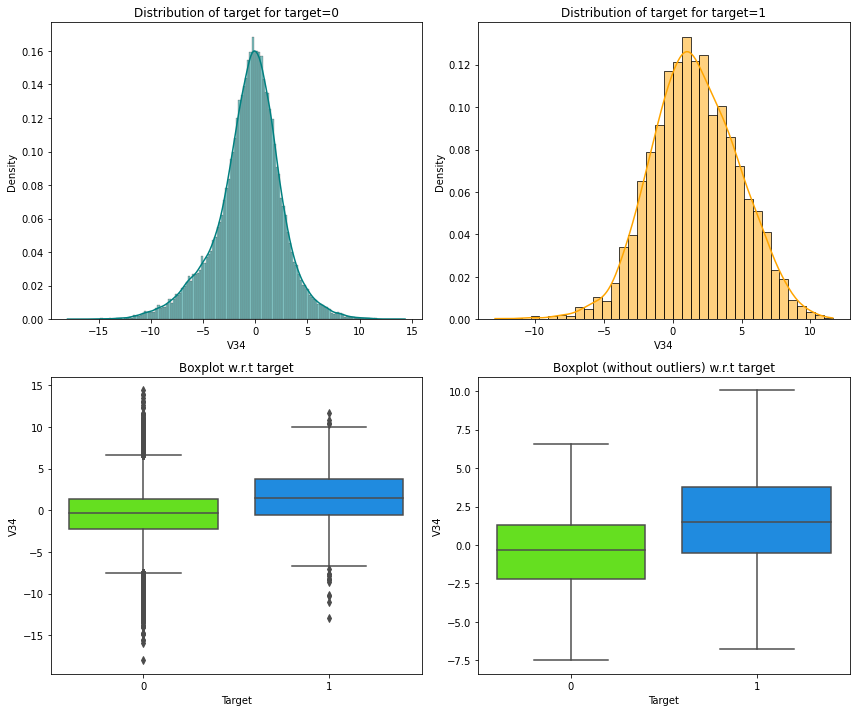

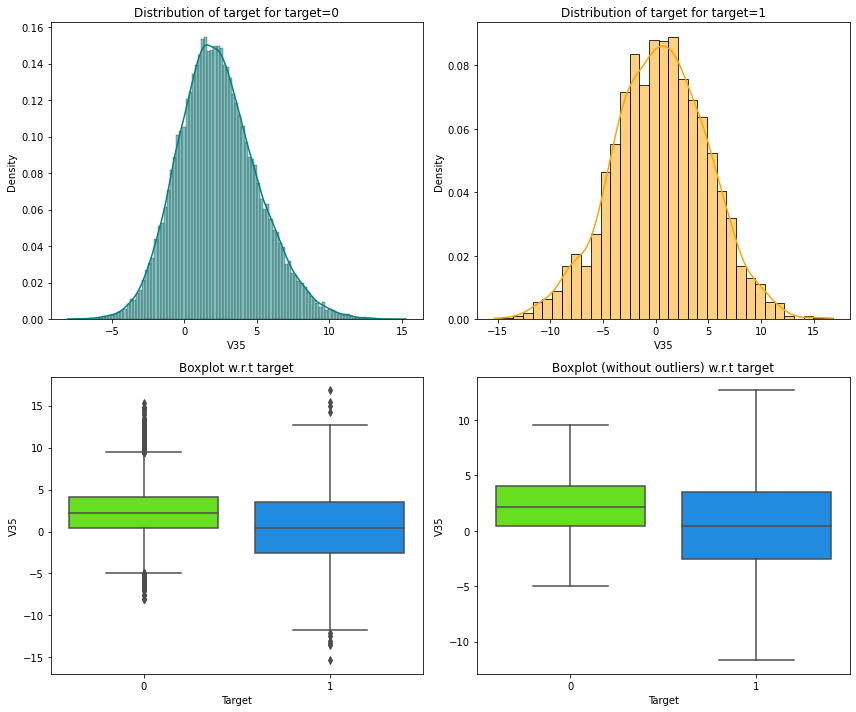

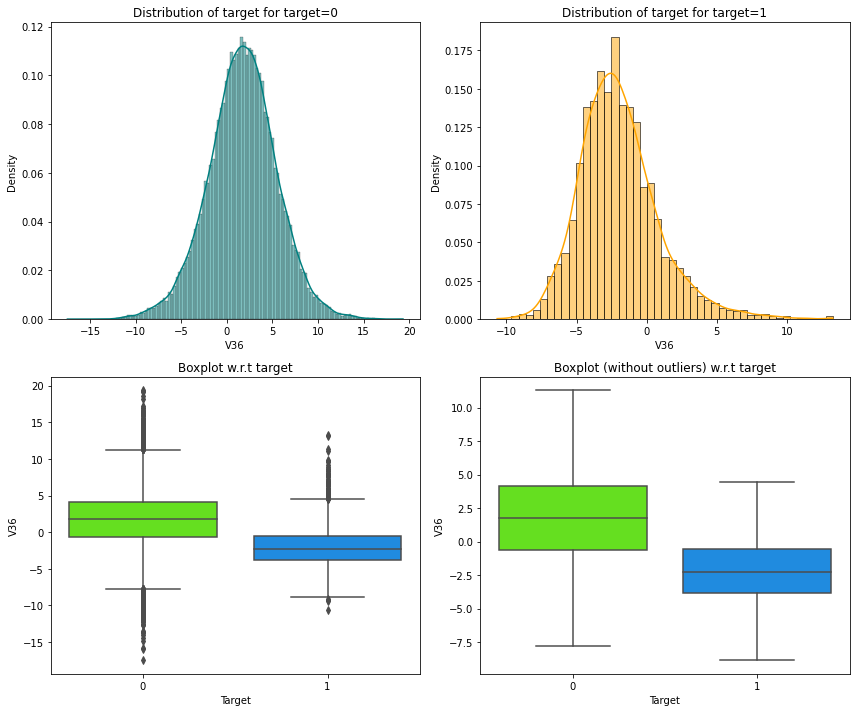

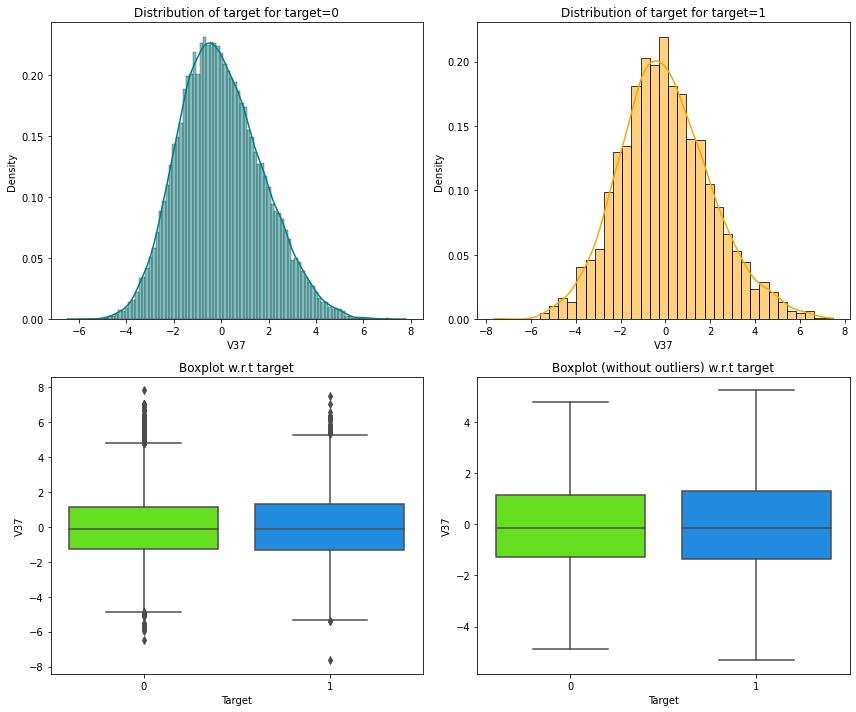

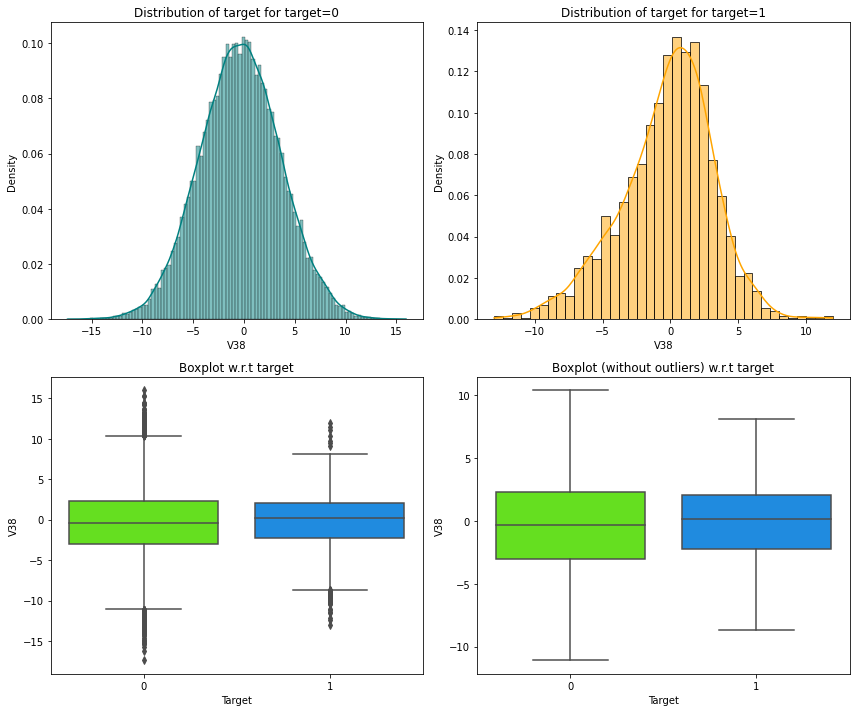

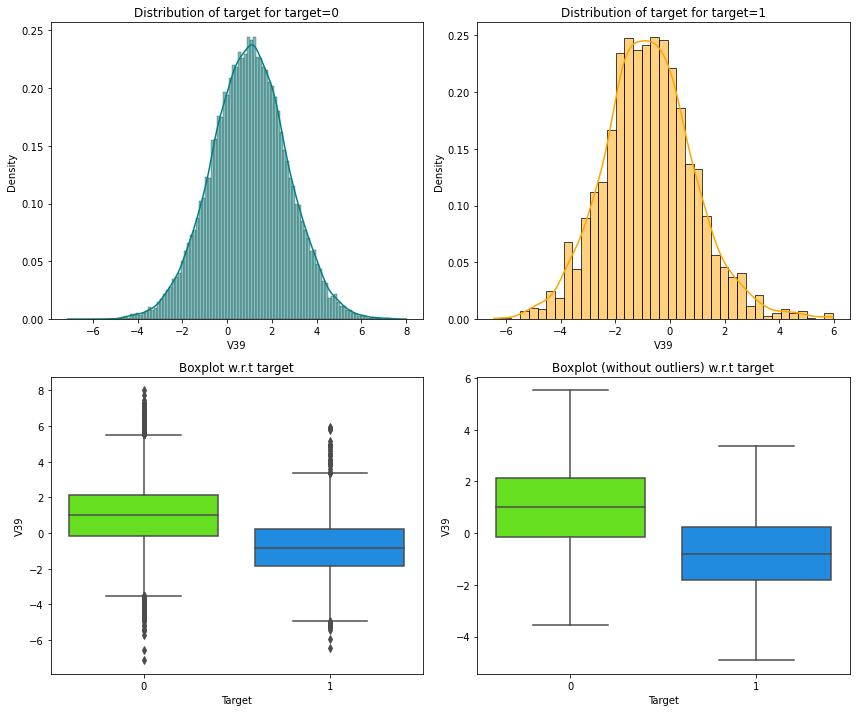

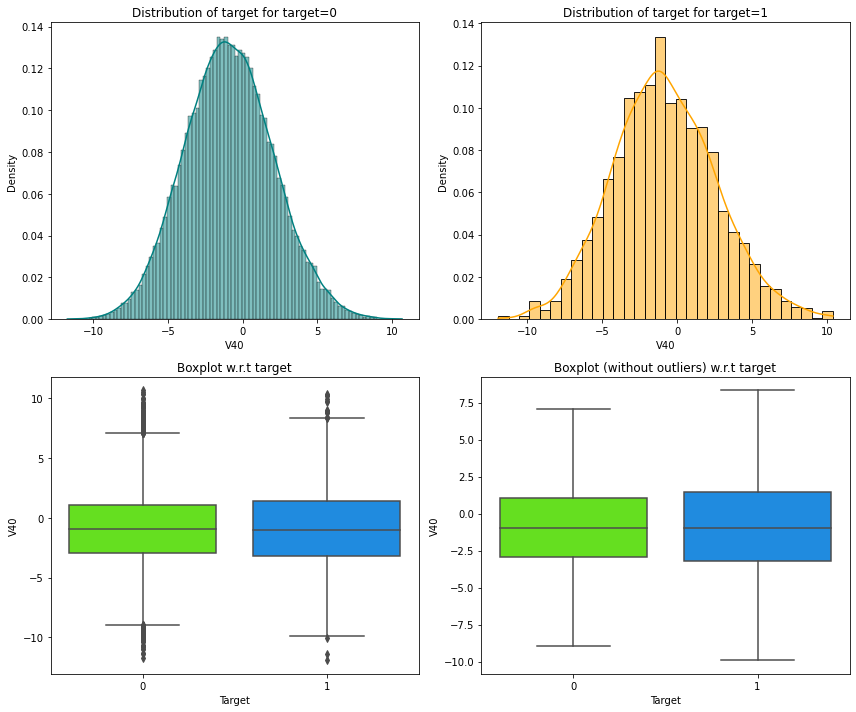

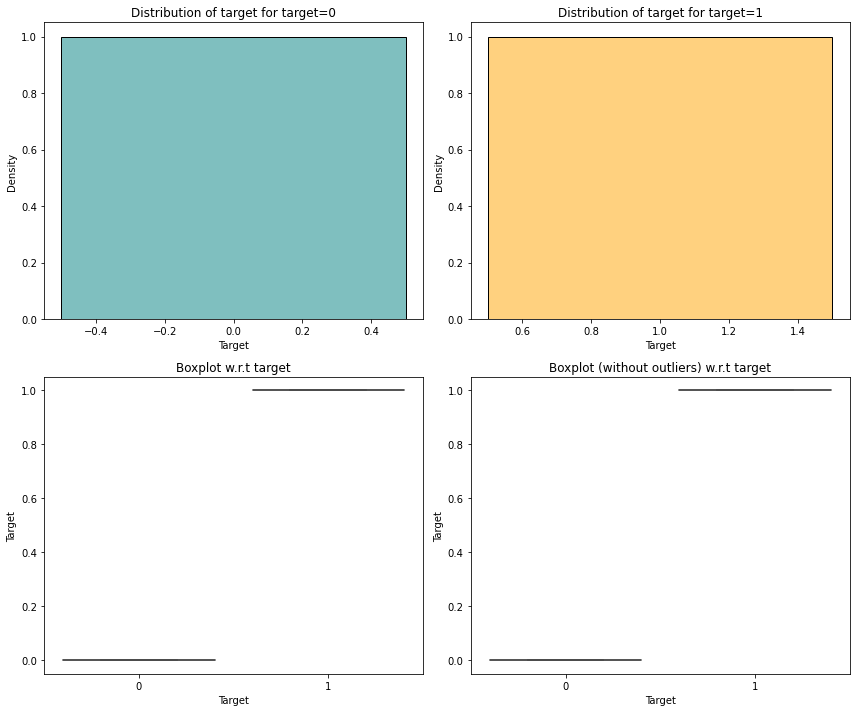

<IPython.core.display.Javascript object>

In [21]:
for feature in data.columns:
    distribution_plot_wrt_target(data, feature, "Target")

* Since we don't know what is beeing measured by our target variables, it is difficult to analyze the correlation between predictors and target. Comparing the distribution of Failure/1 and No Failure/0 by predictor, can help us to understand that relationship a bit better.
* For some variables, for example V9 and V12 among many others, the distribution of Failure and No Failure looks almost the same. The avarage value in the box plot is identical or almost the same, meaning these variables don't seem to be a good indicator of possible failures.
* For some other variables, for example V3 and V15 among others too, the avarage values are different for Failure and No Failure. In the case of V3 the avarage value for Failure/1 (about 0) is lower than the avarage value for No Failure/0 (about 2.5). 

## Data Pre-processing

In [22]:
# Separating target variable and predictors from training data
X = data.drop(columns="Target")
Y = data["Target"]

<IPython.core.display.Javascript object>

In [23]:
# Splitting training data into training and validation set:
X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)

print(X_train.shape, X_val.shape)

(30000, 40) (10000, 40)


<IPython.core.display.Javascript object>

In [24]:
# Separating target variable and predictors from test data
X_test = data_test.drop(columns="Target")
y_test = data_test["Target"]
print(X_test.shape, y_test.shape)

(10000, 40) (10000,)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use median to impute missing values in `V1` and `V2` columns.

In [25]:
imputer = SimpleImputer(strategy="median") 
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

In [26]:
# Checking if the imputer worked.
print(f"X_train has missing values: {np.isnan(X_train).any()}")
print(f"X_val has missing values: {np.isnan(X_val).any()}")
print(f"X_test has missing values: {np.isnan(X_test).any()}")

X_train has missing values: False
X_val has missing values: False
X_test has missing values: False


<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [28]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [29]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.7347560975609755
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8158536585365853
dtree: 0.7335365853658538

Validation Performance:

Bagging: 0.7349177330895795
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521
dtree: 0.7477148080438757


<IPython.core.display.Javascript object>

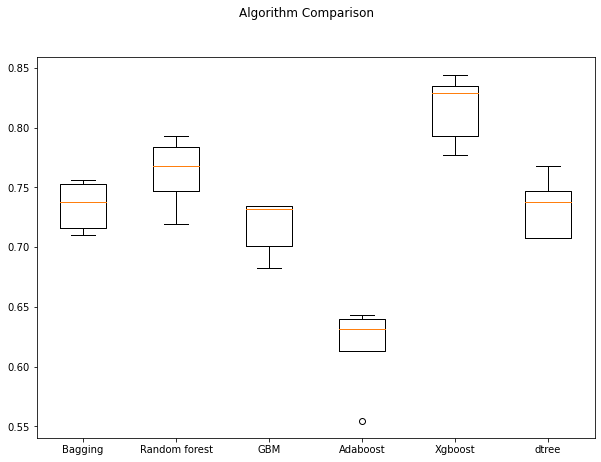

<IPython.core.display.Javascript object>

In [31]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

* All models's performance is decent but not excellent.
* None of the models is overfitting, there are no big difference between Cross Validation and Validation scores.
* With a score of 82% XGBoost is the model that achives the best performance on validation set.
* The box plot shows that the only model with an outlier result in training set is Adaboost, wich is also the model with the lowest performance. The results for all models are quite consistent, without great variations.
* As we know our data is inbalanced, we'll oversample and undersample the training set to try to improve the performance of our models. 

### Model Building with Oversampled data


In [32]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [33]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.9730606488011284
Random forest: 0.9817348377997179
GBM: 0.9148095909732017
Adaboost: 0.8933004231311706
Xgboost: 0.9843794076163611
dtree: 0.9722143864598026

Validation Performance:

Bagging: 0.8354661791590493
Random forest: 0.8683729433272395
GBM: 0.8811700182815356
Adaboost: 0.850091407678245
Xgboost: 0.8793418647166362
dtree: 0.8135283363802559


<IPython.core.display.Javascript object>

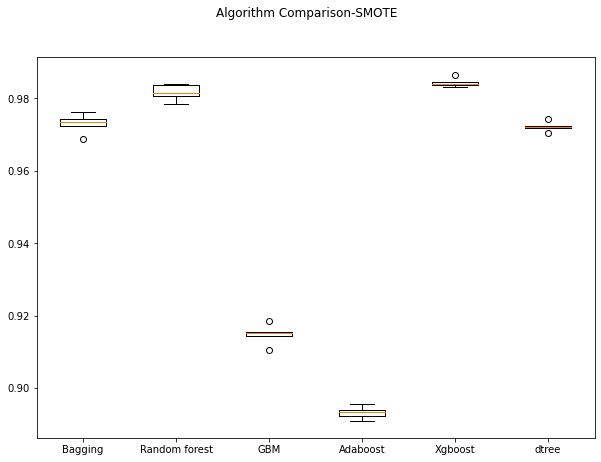

<IPython.core.display.Javascript object>

In [34]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison-SMOTE")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

* Except from Adaboost and GBM all the other models are overfitting the data on training set. 
* The performance for all the models is very good considering the scores for Cross Validation. However, the scores on Validation Performance show the models are overfitting the training data. The scores are still good, but not reliable.
* The CV scores are similar, the boxes in the plot are almost flat.
* GBM presents two outliers on both sides of the boxplot, and Adaboost doesn't have any outliers. 
* GBM and Adaboost perform well on training and validation set, although their performance is lower compared to the other models.
* GBM performance on training set is 91.48% , and 88% on validation set.
* Adaboost performance on training set is 89.33%, and 85% on validation set.
* **Since we want to avoid models that may be overfitting the training data, we'll use GBM and Adaboost for hyperparameters tunning.**

### Model Building with Undersampled data

In [35]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [36]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.875
Random forest: 0.8981707317073171
GBM: 0.8871951219512194
Adaboost: 0.8725609756097562
Xgboost: 0.8939024390243903
dtree: 0.8591463414634146

Validation Performance:

Bagging: 0.8628884826325411
Random forest: 0.8848263254113345
GBM: 0.8884826325411335
Adaboost: 0.8647166361974405
Xgboost: 0.9012797074954296
dtree: 0.8537477148080439


<IPython.core.display.Javascript object>

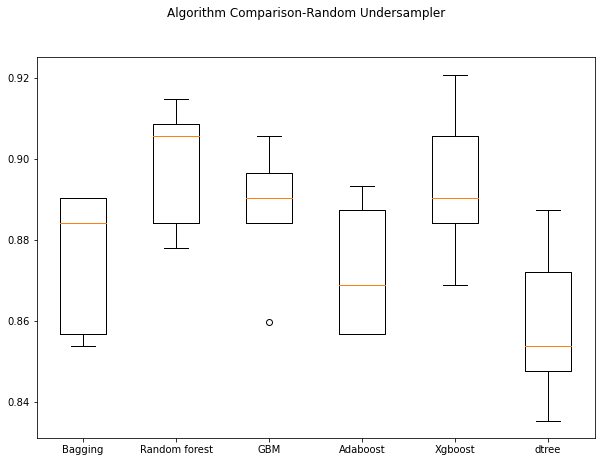

<IPython.core.display.Javascript object>

In [37]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison-Random Undersampler")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

* All models performe well on both training and validation set, all with scores higher than 85 on both sets.
* In contrast to the models built on oversampled data, none of the undersampled models are overfitted.
* The range of values for Cross Validation scores shown in the box plot is wider than the range of oversampled-models. GBM is agian the only model with outliers, only one in this case.
* Although the difference is not big, the two models with the best performance are Random Forest and XGBoost.
* Random Forest performance on training is 89.81%, and 88.48% on validation.
* XGBoost performance on training is 89.39%, and 90.12% on validation.
* **We'll do hyperparameter tuning for Random Forest and XGBoost**

## HyperparameterTuning 

### GBM  with oversampled data - Hyperparameters Tuning

In [38]:
%%time
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9558533145275036:
Wall time: 5min 28s


<IPython.core.display.Javascript object>

In [39]:
# building model with best parameters
gbm_over_tuned = GradientBoostingClassifier(random_state=1,
    subsample=0.7, n_estimators=125, max_features=0.5, learning_rate=1,
)

# Fit the model on training data
gbm_over_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

<IPython.core.display.Javascript object>

In [40]:
# Calculating different metrics on train set
gbm_over_tuned_train = model_performance_classification_sklearn(
    gbm_over_tuned, X_train, y_train
)
print("Training performance:")
gbm_over_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.982,0.780,0.873,0.824


<IPython.core.display.Javascript object>

In [41]:
# Calculating different metrics on validation set
gbm_over_tuned_val = model_performance_classification_sklearn(
    gbm_over_tuned, X_val, y_val
)
print("Validation performance:")
gbm_over_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.976,0.707,0.820,0.760


<IPython.core.display.Javascript object>

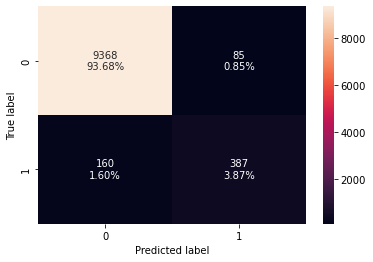

<IPython.core.display.Javascript object>

In [42]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_over_tuned, X_val, y_val)

* After tuning its hyperparameters Gradient Boosting Model achived a great accuracy 97% on validation set.
* However our target score to improve, Recall, has decreased to 70% on validation set.
* False Negatives are 1.6%.

### Adaboost  with oversampled data - Hyperparameters Tuning

In [43]:
%%time
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.940937940761636:
Wall time: 16min 19s


<IPython.core.display.Javascript object>

In [44]:
# building model with best parameters
adaboost_over_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=200,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adaboost_over_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [45]:
# Calculating different metrics on train set
adaboost_over_tuned_train = model_performance_classification_sklearn(
    adaboost_over_tuned, X_train, y_train
)
print("Training performance:")
adaboost_over_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,0.901,0.995,0.946


<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics on validation set
adaboost_over_tuned_val = model_performance_classification_sklearn(
    adaboost_over_tuned, X_val, y_val
)
print("Validation performance:")
adaboost_over_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.987,0.779,0.986,0.870


<IPython.core.display.Javascript object>

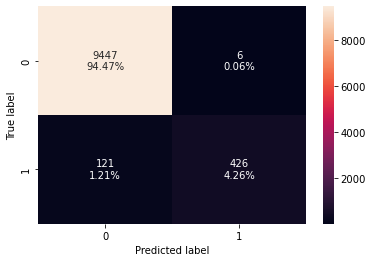

<IPython.core.display.Javascript object>

In [47]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost_over_tuned, X_val, y_val)

* Adaboost model with tuned hyperparameters has really good results on training and validation data, except for Recall on validation data.
* Recall on validation data is 77%.
* False Negarives are a bit lower than in the previous model, 1.21% for Adaboost model.

### RandomForest  with undersampled data - Hyperparameters Tuning

In [48]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.899390243902439:


<IPython.core.display.Javascript object>

In [49]:
# building model with best parameters
randfor_under_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=200,
    min_samples_leaf=2,
    max_samples=0.4,
    max_features="sqrt",
)

# Fit the model on training data
randfor_under_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.4, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics on train set
randfor_under_tuned_train = model_performance_classification_sklearn(
    randfor_under_tuned, X_train, y_train
)
print("Training performance:")
randfor_under_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.991,0.834,0.997,0.908


<IPython.core.display.Javascript object>

In [51]:
# Calculating different metrics on validation set
randfor_under_tuned_val = model_performance_classification_sklearn(
    randfor_under_tuned, X_val, y_val
)
print("Validation performance:")
randfor_under_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.984,0.722,0.990,0.835


<IPython.core.display.Javascript object>

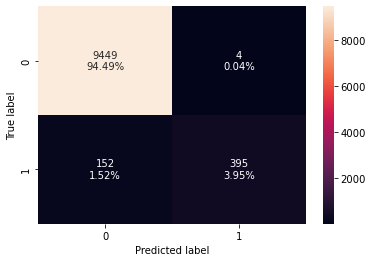

<IPython.core.display.Javascript object>

In [52]:
# creating confusion matrix
confusion_matrix_sklearn(randfor_under_tuned, X_val, y_val)

* Random Forest has excellent scores on both training and validation data, but Recall is still not that good.
* On validation data accuracy is 98%, Precision 99%, F1 83%, but Recall is 72%.
* With 1.52% of False Negatives, Type II Error is higher than for Adaboost.

### XGBoost  with undersampled data - Hyperparameters Tuning

In [53]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9189024390243903:


<IPython.core.display.Javascript object>

In [54]:
# building model with best parameters
xgboost_under_tuned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.1,
    gamma=5,
)

# Fit the model on training data
xgboost_under_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [55]:
# Calculating different metrics on train set
xgboost_under_tuned_train = model_performance_classification_sklearn(
    xgboost_under_tuned, X_train, y_train
)
print("Training performance:")
xgboost_under_tuned_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.987,0.993


<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on validation set
xgboost_under_tuned_val = model_performance_classification_sklearn(
    xgboost_under_tuned, X_val, y_val
)
print("Validation performance:")
xgboost_under_tuned_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.991,0.872,0.964,0.916


<IPython.core.display.Javascript object>

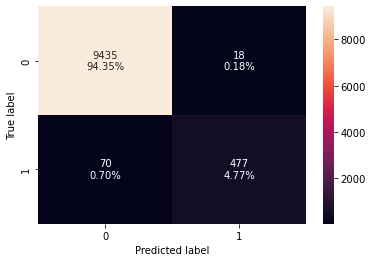

<IPython.core.display.Javascript object>

In [57]:
# creating confusion matrix
confusion_matrix_sklearn(xgboost_under_tuned, X_val, y_val)

* After tuning its hyperparameters, XGBoost model built on undersampled data presents the best results both on training and validation data.
* Accuracy is 99%, Precision 96%, F1 91%, and Recall 87%.
* Although Recall is not as high as the other scores, Type II Error is only 0.7%.

## Model performance comparison and choosing the final model

In [58]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_over_tuned_train.T,
        adaboost_over_tuned_train.T,
        randfor_under_tuned_train.T,
        xgboost_under_tuned_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradientBoosting Oversampled",
    "AdaBoost Oversampled",
    "Random Forest Undersampled",
    "Xgboost Undersampled",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GradientBoosting Oversampled,AdaBoost Oversampled,Random Forest Undersampled,Xgboost Undersampled
Accuracy,0.982,0.994,0.991,0.999
Recall,0.780,0.901,0.834,1.000
Precision,0.873,0.995,0.997,0.987
F1,0.824,0.946,0.908,0.993


<IPython.core.display.Javascript object>

In [59]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_over_tuned_val.T,
        adaboost_over_tuned_val.T,
        randfor_under_tuned_val.T,
        xgboost_under_tuned_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "GradientBoosting Oversampled",
    "AdaBoost Oversampled",
    "Random Forest Undersampled",
    "Xgboost Undersampled",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,GradientBoosting Oversampled,AdaBoost Oversampled,Random Forest Undersampled,Xgboost Undersampled
Accuracy,0.976,0.987,0.984,0.991
Recall,0.707,0.779,0.722,0.872
Precision,0.820,0.986,0.990,0.964
F1,0.760,0.870,0.835,0.916


<IPython.core.display.Javascript object>

* As expected XGBoost Undersampled model achives the best results of all models, both on training and validation data.
* On training data scores are almost perfect: Accuracy 99%, Precision 98%, F1 99%, and Recall 100% 
* The good performance also stands for validation set, with lower but still very good scores: Accuracy 99%, Precision 96%, F1 91%, and Recall 87%. 
* Our target score, Recall, is the higest of all models for both training and test data.
* **XGBoost Undersampled (with tuned hyperparameters) is our final model**

### Test set final performance

In [60]:
# Calculating different metrics on test set
xgboost_under_tuned_test = model_performance_classification_sklearn(
    xgboost_under_tuned, X_test, y_test
)
print("Validation performance:")
xgboost_under_tuned_test

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.989,0.850,0.945,0.895


<IPython.core.display.Javascript object>

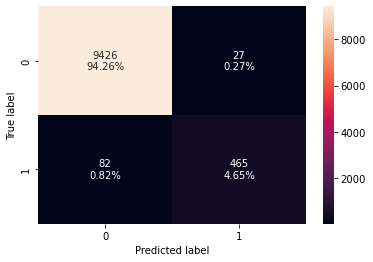

<IPython.core.display.Javascript object>

In [61]:
# creating confusion matrix
confusion_matrix_sklearn(xgboost_under_tuned, X_test, y_test)

* Our final model also perfoms very well on unseen data.
* Test resuls are: Accuracy 98%, Precision 94%, F1 89%, and Recall 85%. The scores are a bit lower than those achived on training and validation but still good.
* False Negatives are lower than 1%.

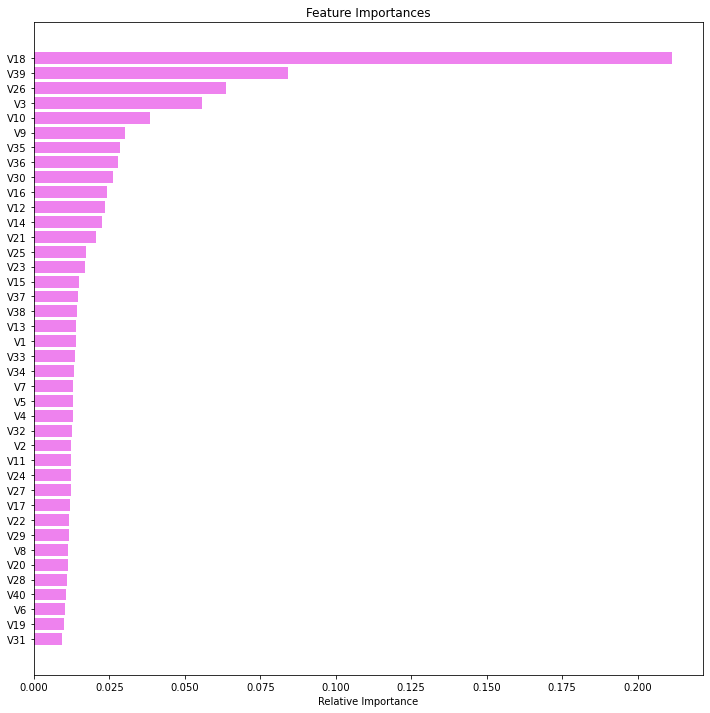

<IPython.core.display.Javascript object>

In [62]:
feature_names = X.columns
importances = xgboost_under_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Features importance can be analyze in four big groups, from predictors with more influence over our target variable to predictors with almost no importance.
* `V18` is the most important feature to predict failures, and its influence over the target is way bigger than the importance of any other variable.
* A second group formed by `V39`, `V26`, and `V3` shows significat explanatory power too.
* The third group is formed by predictor with a mild influence over the target variable, but still some explanatory value. This group is integrated by `V10`, `V9`, `V35`, `V36`, `V30`, `V16`, `V12`, `V14`, and `V21`.
* All other variables form the last and less relevant group of predictors.

## Pipelines to build the final model


In [63]:
#Creating a pipeline for the best model
model = Pipeline(
    steps=[
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                eval_metric="logloss",
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=200,
                learning_rate=0.1,
            ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [64]:
# Separating target variable and other variables for training set
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Separating target variable and other variables for test
X_test1 = data_test.drop(columns="Target")
y_test1 = data_test["Target"] 


<IPython.core.display.Javascript object>

In [65]:
# Treating missing values with a simple imputer as we did before
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# Treating missing values in the test set
X_test1 = imputer.fit_transform(X_test1)

<IPython.core.display.Javascript object>

In [66]:
# Random Under Sampling Technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_under1, y_under1 = rus.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [67]:
#Fitting our final model using the pipeline
model.fit(X_under1, y_under1)

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [68]:
#Predicting values for test data using our pipeline
predictions = model.predict(X_test1)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

* Using an XGBoosting Classifier, with tuned hyperparameters, we had created a model that can successfully predict the wind turbines' failure.
* This model'll allow ReneWind to predict future failures based on the data generated by the turbines' sensores, and therefore significantly reduce its cost of maintainance. 
* Less than 1% of the future failures may not be correctly identify by the model. This demonstrates that the model can achieve the objective stablished by our client, which was to identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost.
* The data collected through sensors is confidential which makes its interpretation more difficult. However, we do know from our exploratory analysis and the features' importance of our model that there are some variables that our client needs to keep in closed control. Keeping track of the value for these variables will help to identify failures before they occur.
* `V18` is the most important feature to predict failures, and its influence over the target is way bigger than the importance of any other variable. The avarage value for `V18` in the case of No Failure is about 1.25, while the avarage value for Failure is -2.5. No Failure presents only ocasionally values under -5. Therefore a value lower than -5 is a clear indicator of possible failure. Also values higher than 7.5 are only associated with No Failure.
* A second group formed by `V39`, `V26`, and `V3` shows significat explanatory power too and need to be carefully tracked by our client. 
* In the case of `V39`, the avarage value for Failure is about -0.75, while the avarage for No Failure is 1. Most of the failures are distributed in values between 0 and -2.
* `V26` is more difficult to interpret since No Failures present a wide range of values. Only in rare ocassions the values for Failure cases are higher than 10. The avarage value in case of Failure is a bit lower than 0, while in the case of No failure is about 1.
* `V3`'s avarage value for Failure (about 0) is lower than the avarage value for No Failure (about 2.5). When the value of `V3` is close to 0 or lower, it's an indicator of possible failure.
* To sum up, our client can apply our model to predict future failures based on the data generated by the turbines. There are also some reference values our client should keep on track since they are the most important indicators of failure/no failure.

***